# **Machine Learning Project - Group AR**

## **1. Introduction**

## **2. Data Cleaning**

### **2.1 Import**

In [143]:
# 1) Core imports
from pathlib import Path
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")


# Load dataset from GitHub commit permalink (online, reproducible)
DATA_URL = "https://raw.githubusercontent.com/Behnia02/Group_AR/631a8d5f9337e2a4b9351ffb13ca583d28459dc1/HR-Employee-Attrition.csv"

df = pd.read_csv(DATA_URL)

print(f"Dataset loaded online from: {DATA_URL}")
print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns")
display(df.head())

Dataset loaded online from: https://raw.githubusercontent.com/Behnia02/Group_AR/631a8d5f9337e2a4b9351ffb13ca583d28459dc1/HR-Employee-Attrition.csv
Shape: 1470 rows x 35 columns


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [144]:
# Build summary table
summary_table = pd.DataFrame({
    "Total Values": df.count(),
    "Null Values": df.isna().sum(),
    "Unique Values": df.nunique()})

# Display the summary table
summary_table.head(len(summary_table))

Total Values  Null Values  Unique Values
Age                               1470            0             43
Attrition                         1470            0              2
BusinessTravel                    1470            0              3
DailyRate                         1470            0            886
Department                        1470            0              3
DistanceFromHome                  1470            0             29
Education                         1470            0              5
EducationField                    1470            0              6
EmployeeCount                     1470            0              1
EmployeeNumber                    1470            0           1470
EnvironmentSatisfaction           1470            0              4
Gender                            1470            0              2
HourlyRate                        1470            0             71
JobInvolvement                    1470            0              4
JobLevel                          1470            0              5
JobRole                           1470            0              9
JobSatisfaction                   1470            0              4
MaritalStatus                     1470            0              3
MonthlyIncome                     1470            0           1349
MonthlyRate                       1470            0           1427
NumCompaniesWorked                1470            0             10
Over18                            1470            0              1
OverTime                          1470            0              2
PercentSalaryHike                 1470            0             15
PerformanceRating                 1470            0              2
RelationshipSatisfaction          1470            0              4
StandardHours                     1470            0              1
StockOptionLevel                  1470            0              4
TotalWorkingYears                 1470            0             40
TrainingTimesLastYear             1470            0              7
WorkLifeBalance                   1470            0              4
YearsAtCompany                    1470            0             37
YearsInCurrentRole                1470            0             19
YearsSinceLastPromotion           1470            0             16
YearsWithCurrManager              1470            0             18

From this table, we can conclude that there is no missing data in the dataset, since all variables have complete records across the 1470 observations.

### **2.2 Handling redundant data**

In [145]:
#Look for duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [146]:
## Redundant columns: Variables with only one unique value

one_unique_vars = summary_table[summary_table["Unique Values"] == 1].index.tolist()
print(one_unique_vars)



['EmployeeCount', 'Over18', 'StandardHours']


In [147]:
# Drop the columns with just one unique value and EmployeeNumber (ID variable)
df = df.drop(columns=["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], errors="ignore")

# Drop redundant columns with the same sematic meaning
df = df.drop(columns=["DailyRate", "HourlyRate"], errors="ignore")

### **2.3 Handling of Binary Variables**

#### **2.3.1 Identification of Binary Variables**

In [148]:
#Printing out binary variables
import pandas as pd

# --- Identify binary variables (exclude PerformanceRating) ---
binary_vars = df[[col for col in df.columns
                  if (df[col].nunique() == 2 and col != "PerformanceRating")
                  ]]

# --- Pretty display of the first rows ---
binary_vars.head().style.set_properties(**{
    'border': '1px solid black',
    'padding': '4px'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#d3d3d3'),
              ('color', 'black'),
              ('font-weight', 'bold'),
              ('text-align', 'center')]
}])

#### **2.3.2 Transformation of Binary Variables**

In [149]:


#Turning binary variables to numeric
# --- Copy dataset to avoid modifying original ---
df = df.copy()

# --- Explicit binary mappings ---
df["Attrition_Flag"] = df["Attrition"].map({"Yes": 1, "No": 0})
df["OverTime_Flag"]  = df["OverTime"].map({"Yes": 1, "No": 0})
df["Gender_Flag"]    = df["Gender"].map({"Male": 1, "Female": 0})


# --- Styled output preview ---
df_preview = df[[
    "Attrition", "Attrition_Flag",
    "OverTime", "OverTime_Flag",
    "Gender", "Gender_Flag",

]].head()

df_preview.style.set_properties(**{
    'border': '1px solid black',
    'padding': '4px'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#d3d3d3'),
              ('color', 'black'),
              ('font-weight', 'bold'),
              ('text-align', 'center')]
}])


#### **2.3.3 Renaming of Binary Variables**

In [150]:
#Drop original categorical columns after encoding
df = df.drop(columns=["Attrition", "OverTime", "Gender"])

#Renaming encoded columns to original names for clarity
df = df.rename(columns={
    "Attrition_Flag": "Attrition",
    "OverTime_Flag": "OverTime",
    "Gender_Flag": "Gender"
})



### **2.4 Missing Value Check**

In [151]:

#Checking for missing values
if df.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values found")


No missing values found


In [152]:
#Sanity check
pd.set_option('display.max_columns', None)
df.head()

Age     BusinessTravel              Department  DistanceFromHome  \
0   41      Travel_Rarely                   Sales                 1   
1   49  Travel_Frequently  Research & Development                 8   
2   37      Travel_Rarely  Research & Development                 2   
3   33  Travel_Frequently  Research & Development                 3   
4   27      Travel_Rarely  Research & Development                 2   

   Education EducationField  EnvironmentSatisfaction  JobInvolvement  \
0          2  Life Sciences                        2               3   
1          1  Life Sciences                        3               2   
2          2          Other                        4               2   
3          4  Life Sciences                        4               3   
4          1        Medical                        1               3   

   JobLevel                JobRole  JobSatisfaction MaritalStatus  \
0         2        Sales Executive                4        Single   
1         2     Research Scientist                2       Married   
2         1  Laboratory Technician                3        Single   
3         1     Research Scientist                3       Married   
4         1  Laboratory Technician                2       Married   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
0           5993        19479                   8                 11   
1           5130        24907                   1                 23   
2           2090         2396                   6                 15   
3           2909        23159                   1                 11   
4           3468        16632                   9                 12   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                   4                        0                     5   
1                   7                        1                     7   
2                   0                        0                     0   
3                   7                        3                     0   
4                   2                        2                     2   

   Attrition  OverTime  Gender  
0          1         1       0  
1          0         0       1  
2          1         1       1  
3          0         1       0  
4          0         0       1

### **2.5 Classification of Variables**

#### **2.5.1 Classification by Type**

In [ ]:
# TARGET
target = "Attrition_Flag"


# CATEGORICAL VARIABLES (Nominal)
categorical_vars = [
    "BusinessTravel",
    "Department",
    "EducationField",
    "JobRole",
    "MaritalStatus",
    "OverTime",
    "Gender",   
]

# NUMERICAL VARIABLES
numerical_vars = [
    "Education",
    "EnvironmentSatisfaction",
    "JobInvolvement",
    "JobLevel",
    "JobSatisfaction",
    "RelationshipSatisfaction",
    "StockOptionLevel",
    "TrainingTimesLastYear",
    "WorkLifeBalance", 
    "Age",
    "DistanceFromHome",
    "MonthlyIncome",
    "MonthlyRate",
    "NumCompaniesWorked",
    "PercentSalaryHike",
    "TotalWorkingYears",
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager"
]

# FINAL FEATURE LIST (FOR MODELING)

feature_vars = (
    categorical_vars +
    numerical_vars
)

#### **2.5.2 Classification by Thematic Categories**

In [154]:
# TARGET
target = "Attrition_Flag"


# Demographics
demographic_vars = [
    "Age",
    "Gender",
    "MaritalStatus",
    "Education",
    "EducationField",
    "DistanceFromHome"
]


# Compensation & Financial Incentives
compensation_vars = [
    "MonthlyIncome",
    "MonthlyRate",
    "PercentSalaryHike",
    "StockOptionLevel",
    "JobLevel"
]


# Job Structure & Role Characteristics
job_structure_vars = [
    "Department",
    "JobRole",
    "BusinessTravel",
    "OverTime",
    "JobInvolvement"
]


# Career Progression & Tenure
career_progression_vars = [
    "TotalWorkingYears",
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager",
    "NumCompaniesWorked",
    "TrainingTimesLastYear"
]


# Workplace Satisfaction & Environment
satisfaction_vars = [
    "JobSatisfaction",
    "EnvironmentSatisfaction",
    "RelationshipSatisfaction",
    "WorkLifeBalance",
]



### **2.5 Metatable of the Included Variables**

In [155]:
# Metadata table based on current df only

def infer_var_type(series):
    if pd.api.types.is_numeric_dtype(series):
        if series.nunique() == 2:
            return "Binary"
        return "Numerical"
    return "Categorical"

# Optional short descriptions for common columns (only used if present in df)
descriptions = {
    "Age": "Employee age in years",
    "Attrition": "Binary target: attrition",
    "BusinessTravel": "Frequency of business travel",
    "Department": "Department of the employee",
    "DistanceFromHome": "Distance from home to office",
    "Education": "Education level (1-5)",
    "EducationField": "Field of education",
    "EnvironmentSatisfaction": "Satisfaction with work environment (1-4)",
    "Gender": "Binary gender flag",
    "JobInvolvement": "Job involvement (1-4)",
    "JobLevel": "Job hierarchy level",
    "JobRole": "Role or position in company",
    "JobSatisfaction": "Job satisfaction (1-4)",
    "MaritalStatus": "Marital status of employee",
    "MonthlyIncome": "Monthly salary",
    "MonthlyRate": "Monthly rate for payroll purposes",
    "NumCompaniesWorked": "Number of previous companies worked",
    "OverTime": "Binary overtime flag",
    "PercentSalaryHike": "Percentage salary increase",
    "RelationshipSatisfaction": "Relationship satisfaction (1-4)",
    "StockOptionLevel": "Stock option level",
    "TotalWorkingYears": "Total years of work experience",
    "TrainingTimesLastYear": "Number of trainings attended last year",
    "WorkLifeBalance": "Work-life balance rating (1-4)",
    "YearsAtCompany": "Years spent at current company",
    "YearsInCurrentRole": "Years spent in current role",
    "YearsSinceLastPromotion": "Years since last promotion",
    "YearsWithCurrManager": "Years working with current manager"
}

# Build metadata table for all columns in df
metadata_df = pd.DataFrame([
    [col, str(df[col].dtype), infer_var_type(df[col]), descriptions.get(col, "-")]
    for col in df.columns
], columns=["Variable Name", "Data Type", "Variable Type", "Description"])

metadata_styled = (
    metadata_df.style
    .set_properties(**{'border': '1px solid black', 'padding': '4px'})
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#d3d3d3'),
                  ('color', 'black'),
                  ('font-weight', 'bold'),
                  ('text-align', 'center')]
    }])
    .hide(axis="index")
)

metadata_styled

## **3. Exploratory Data Analysis**

### **3.1 Descriptive Statistics**

In [156]:
# Descriptive statistics for numeric variables (including median + mode), rounded to 2 decimals
num_cols = df.select_dtypes(include="number").columns.tolist()

numeric_summary = (
    df[num_cols]
    .agg([
        "count",
        "mean",
        "std",
        "min",
        lambda s: s.quantile(0.25),
        "median",
        lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan,
        lambda s: s.quantile(0.75),
        "max"
    ])
    .T
)

numeric_summary.columns = ["count", "mean", "std", "min", "25%", "median", "mode", "75%", "max"]
numeric_summary = numeric_summary.round(2)

numeric_summary

count      mean      std     min     25%   median  \
Age                       1470.0     36.92     9.14    18.0    30.0     36.0   
DistanceFromHome          1470.0      9.19     8.11     1.0     2.0      7.0   
Education                 1470.0      2.91     1.02     1.0     2.0      3.0   
EnvironmentSatisfaction   1470.0      2.72     1.09     1.0     2.0      3.0   
JobInvolvement            1470.0      2.73     0.71     1.0     2.0      3.0   
JobLevel                  1470.0      2.06     1.11     1.0     1.0      2.0   
JobSatisfaction           1470.0      2.73     1.10     1.0     2.0      3.0   
MonthlyIncome             1470.0   6502.93  4707.96  1009.0  2911.0   4919.0   
MonthlyRate               1470.0  14313.10  7117.79  2094.0  8047.0  14235.5   
NumCompaniesWorked        1470.0      2.69     2.50     0.0     1.0      2.0   
PercentSalaryHike         1470.0     15.21     3.66    11.0    12.0     14.0   
PerformanceRating         1470.0      3.15     0.36     3.0     3.0      3.0   
RelationshipSatisfaction  1470.0      2.71     1.08     1.0     2.0      3.0   
StockOptionLevel          1470.0      0.79     0.85     0.0     0.0      1.0   
TotalWorkingYears         1470.0     11.28     7.78     0.0     6.0     10.0   
TrainingTimesLastYear     1470.0      2.80     1.29     0.0     2.0      3.0   
WorkLifeBalance           1470.0      2.76     0.71     1.0     2.0      3.0   
YearsAtCompany            1470.0      7.01     6.13     0.0     3.0      5.0   
YearsInCurrentRole        1470.0      4.23     3.62     0.0     2.0      3.0   
YearsSinceLastPromotion   1470.0      2.19     3.22     0.0     0.0      1.0   
YearsWithCurrManager      1470.0      4.12     3.57     0.0     2.0      3.0   
Attrition                 1470.0      0.16     0.37     0.0     0.0      0.0   
OverTime                  1470.0      0.28     0.45     0.0     0.0      0.0   
Gender                    1470.0      0.60     0.49     0.0     0.0      1.0   

                            mode      75%      max  
Age                         35.0     43.0     60.0  
DistanceFromHome             2.0     14.0     29.0  
Education                    3.0      4.0      5.0  
EnvironmentSatisfaction      3.0      4.0      4.0  
JobInvolvement               3.0      3.0      4.0  
JobLevel                     1.0      3.0      5.0  
JobSatisfaction              4.0      4.0      4.0  
MonthlyIncome             2342.0   8379.0  19999.0  
MonthlyRate               4223.0  20461.5  26999.0  
NumCompaniesWorked           1.0      4.0      9.0  
PercentSalaryHike           11.0     18.0     25.0  
PerformanceRating            3.0      3.0      4.0  
RelationshipSatisfaction     3.0      4.0      4.0  
StockOptionLevel             0.0      1.0      3.0  
TotalWorkingYears           10.0     15.0     40.0  
TrainingTimesLastYear        2.0      3.0      6.0  
WorkLifeBalance              3.0      3.0      4.0  
YearsAtCompany               5.0      9.0     40.0  
YearsInCurrentRole           2.0      7.0     18.0  
YearsSinceLastPromotion      0.0      3.0     15.0  
YearsWithCurrManager         2.0      7.0     17.0  
Attrition                    0.0      0.0      1.0  
OverTime                     0.0      1.0      1.0  
Gender                       1.0      1.0      1.0

#### **3.2 Univaraiate Analysis**

**3.2.1 Categorical Variables**

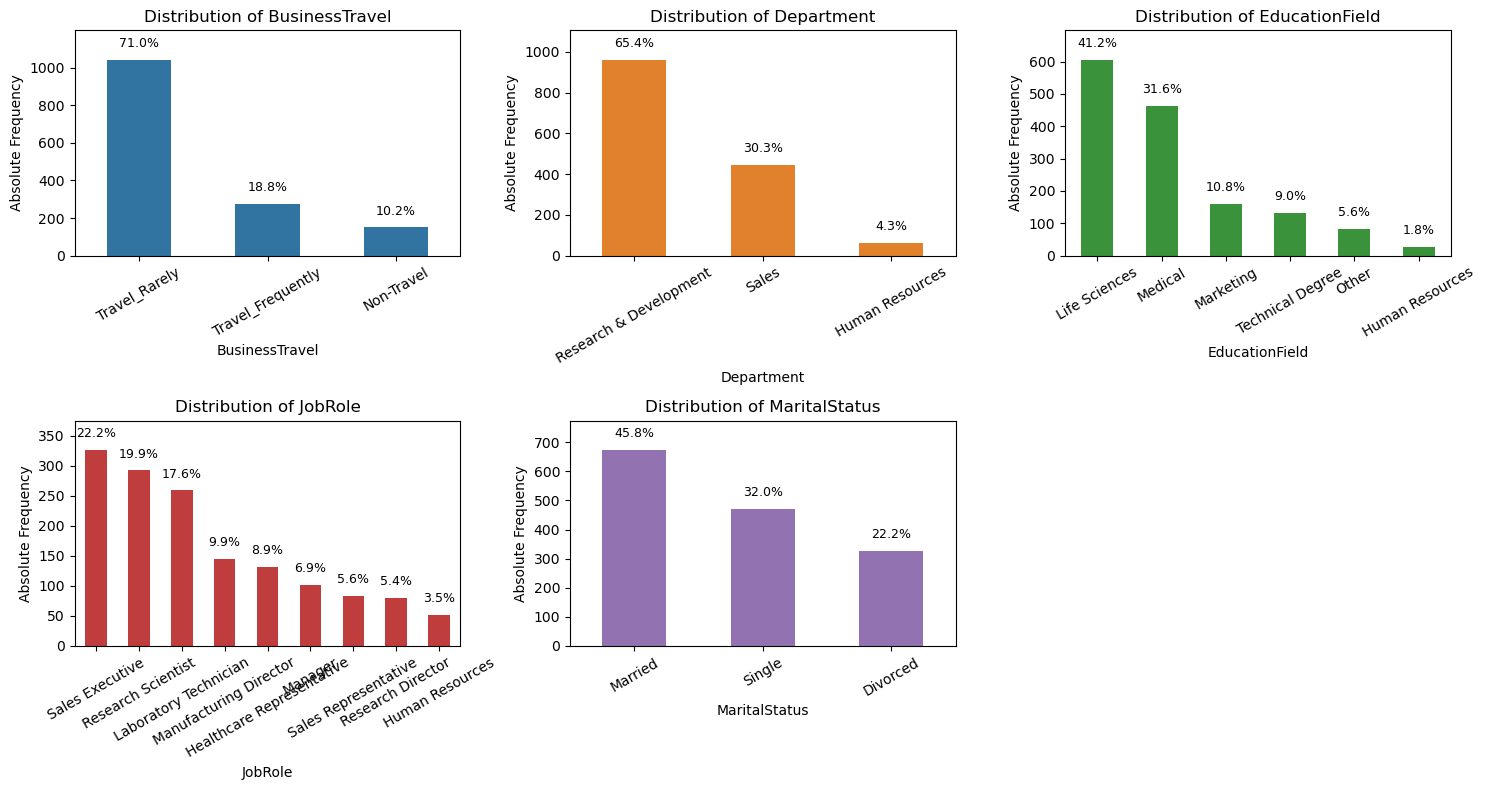

In [157]:
import math

# number of categorical variables
n_plots = len(categorical_vars)

# number of columns per row (you can change this)
n_cols = 3

# compute required number of rows
n_rows = math.ceil(n_plots / n_cols)

# automatically generate enough colors
colors = sns.color_palette("tab10", n_plots)

# create subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

# flatten axes (important when rows > 1)
axes = axes.flatten()

# loop through each categorical variable and plot
for i, col in enumerate(categorical_vars):
    
    # calculate absolute and relative frequencies
    freq_abs = df[col].value_counts()
    freq_rel = df[col].value_counts(normalize=True) * 100

    # bar plot
    sns.barplot(
        x=freq_abs.index,
        y=freq_abs.values,
        ax=axes[i],
        color=colors[i],
        width=0.5
    )

    # formatting
    max_val = freq_abs.values.max()
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_ylabel("Absolute Frequency")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis="x", rotation=30)
    axes[i].set_ylim(0, max_val * 1.15)

    # add relative frequency labels
    for j, val in enumerate(freq_abs.values):
        axes[i].text(
            j,
            val + max_val*0.05,
            f"{freq_rel.values[j]:.1f}%",
            ha="center",
            va="bottom",
            fontsize=9
        )

# remove empty subplots (important when grid > number of plots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### **3.2.2 Numerical Variables**

**3.2.2.1 Frequency distribution**

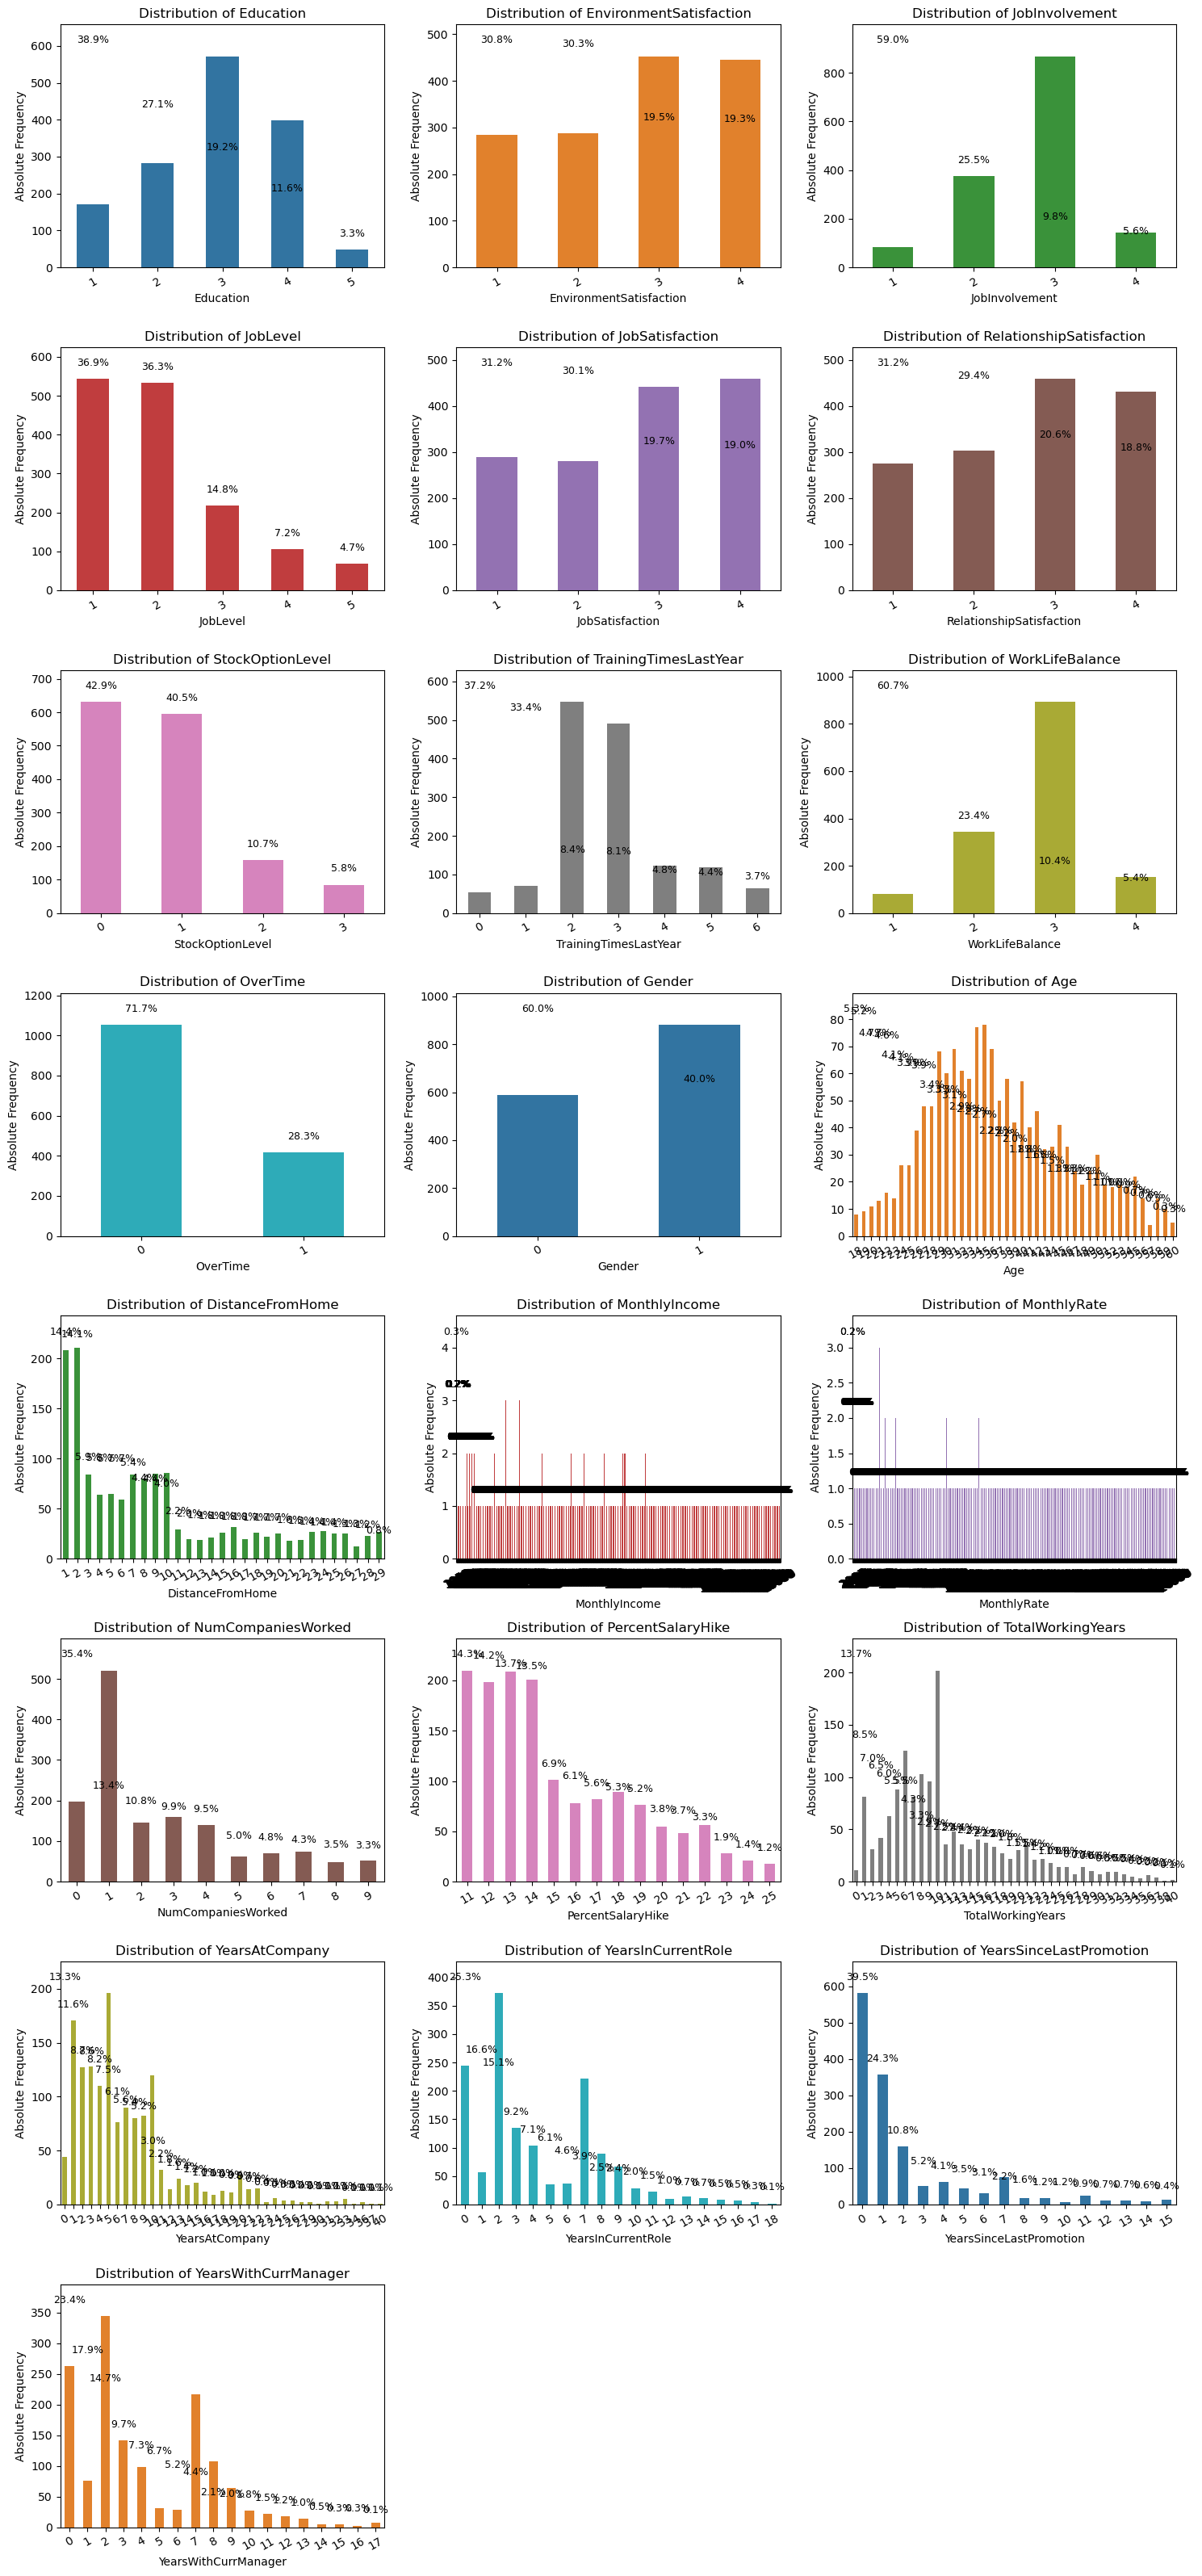

In [158]:
import math

# number of ordinal variables
n_plots = len(numerical_vars)

# number of columns per row
n_cols = 3

# compute required number of rows
n_rows = math.ceil(n_plots / n_cols)

# automatically generate enough colors
colors = sns.color_palette("tab10", n_plots)

# create subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

# flatten axes (important when rows > 1)
axes = axes.flatten()

# loop through each ordinal variable and plot
for i, col in enumerate(numerical_vars):

    # calculate absolute and relative frequencies
    freq_abs = df[col].value_counts()
    freq_rel = df[col].value_counts(normalize=True) * 100

    # bar plot
    sns.barplot(
        x=freq_abs.index,
        y=freq_abs.values,
        ax=axes[i],
        color=colors[i],
        width=0.5
    )

    # formatting
    max_val = freq_abs.values.max()
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_ylabel("Absolute Frequency")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis="x", rotation=30)
    axes[i].set_ylim(0, max_val * 1.15)

    # add relative frequency labels
    for j, val in enumerate(freq_abs.values):
        axes[i].text(
            j,
            val + max_val * 0.05,
            f"{freq_rel.values[j]:.1f}%",
            ha="center",
            va="bottom",
            fontsize=9
        )

# remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**3.2.2.2 Box Plots**

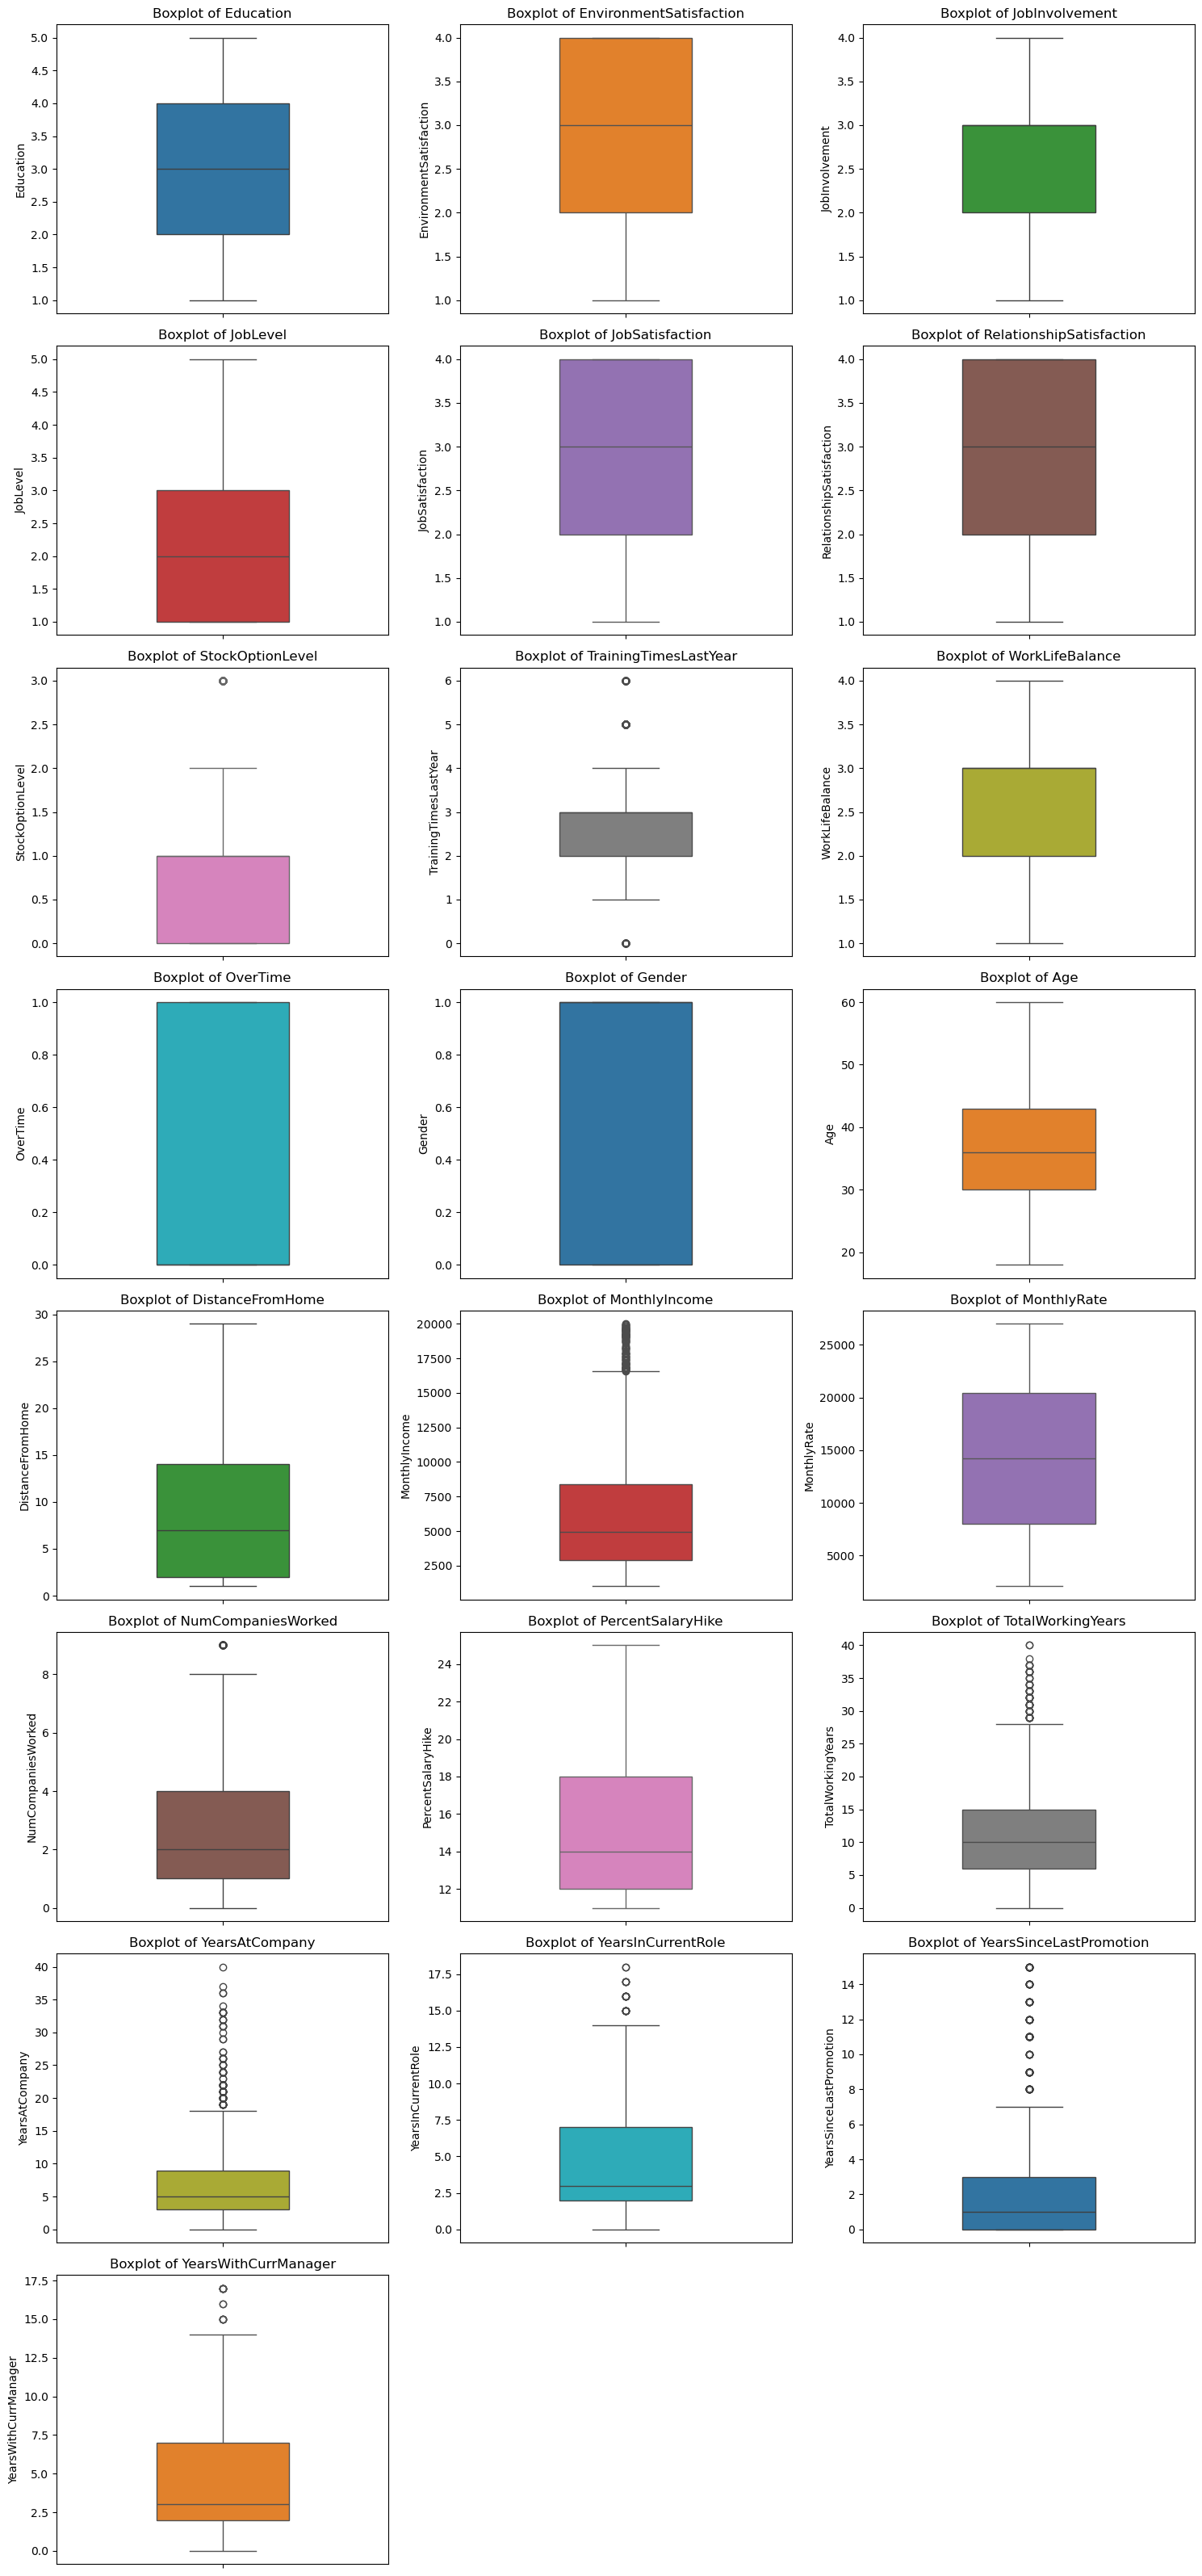

In [159]:
# number of plots
n_plots = len(numerical_vars)

# layout
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

# SAME color logic as before
colors = sns.color_palette("tab10", n_plots)

# create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_vars):
    
    sns.boxplot(
        y=df[col],
        ax=axes[i],
        width=0.4,
        color=colors[i]   # <-- same color per variable
    )
    
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_ylabel(col)

# remove empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### **3.2.3 Continuous Variables**

**3.2.3.1 Histograms & Kernel density plots**

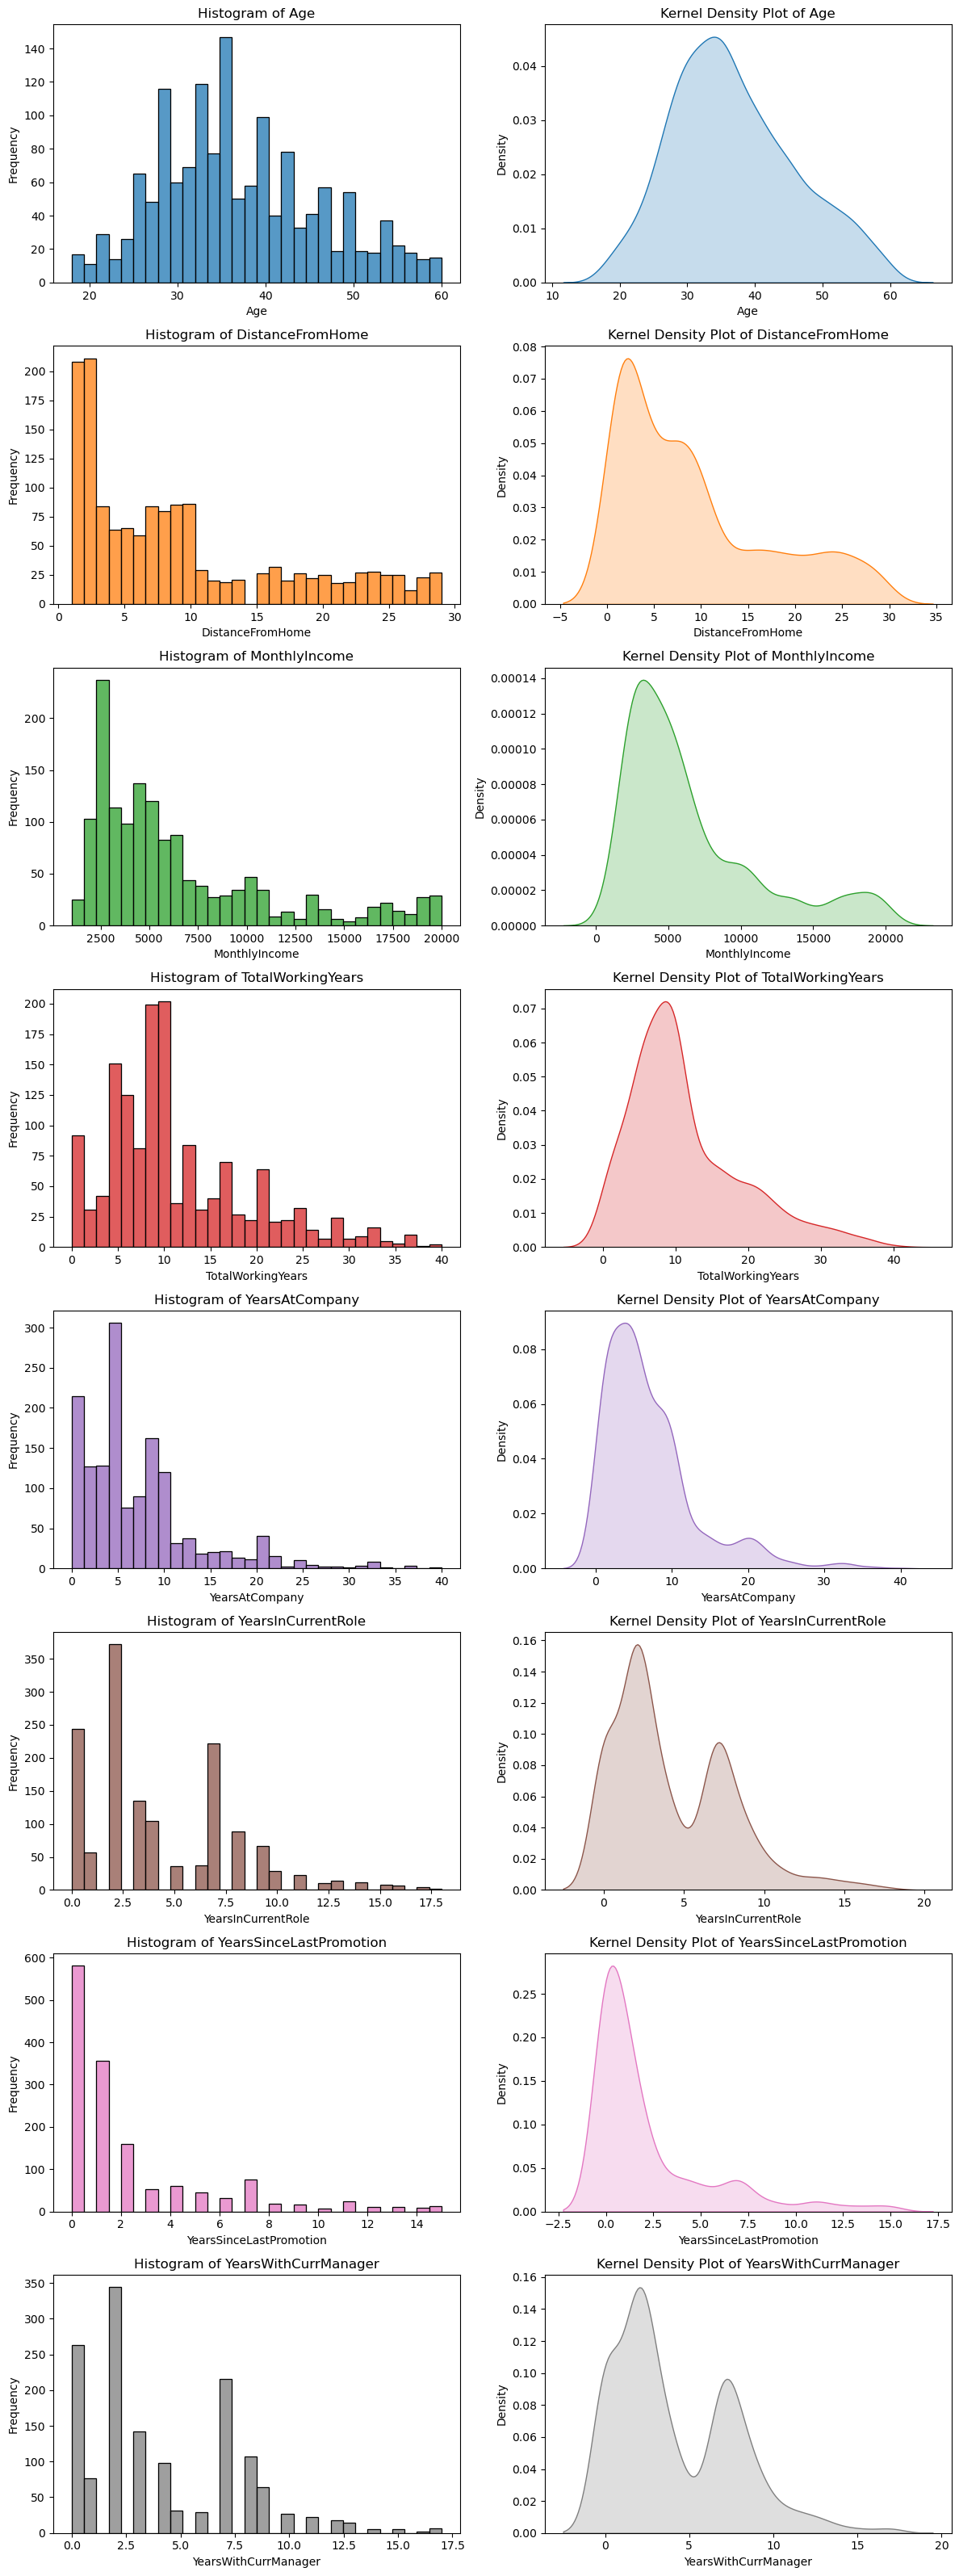

In [160]:
#Consider the distribution of discrete variables with high cardinality as continuous for further analysis
continuous_vars = [
    "Age",
    "DistanceFromHome",
    "MonthlyIncome",
    "TotalWorkingYears",
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager"
]

n_vars = len(continuous_vars)

# Create color palette (same logic as before)
colors = sns.color_palette("tab10", n_vars)

fig, axes = plt.subplots(n_vars, 2, figsize=(12, 4 * n_vars))

# If only one variable → reshape axes
if n_vars == 1:
    axes = [axes]

for i, col in enumerate(continuous_vars):
    x = df[col].dropna()
    color = colors[i]

    # 1️⃣ Histogram (left)
    sns.histplot(
        x,
        bins=30,
        ax=axes[i][0],
        color=color
    )
    axes[i][0].set_title(f"Histogram of {col}")
    axes[i][0].set_xlabel(col)
    axes[i][0].set_ylabel("Frequency")

    # 2️⃣ KDE (right)
    sns.kdeplot(
        x,
        ax=axes[i][1],
        fill=True,
        color=color
    )
    axes[i][1].set_title(f"Kernel Density Plot of {col}")
    axes[i][1].set_xlabel(col)
    axes[i][1].set_ylabel("Density")

plt.tight_layout()
plt.show()

**3.2.3.2 Skewness & Kurtosis**

In [161]:
results = []

for col in continuous_vars:
    x = df[col].dropna()
    results.append({
        "Variable": col,
        "Skewness": x.skew(),
        "Kurtosis": x.kurt()   # pandas = excess kurtosis (normal ≈ 0)
    })

skew_kurt_df = pd.DataFrame(results).sort_values("Variable").reset_index(drop=True).round(2)
skew_kurt_df

Variable  Skewness  Kurtosis
0                      Age      0.41     -0.40
1         DistanceFromHome      0.96     -0.22
2            MonthlyIncome      1.37      1.01
3        TotalWorkingYears      1.12      0.92
4           YearsAtCompany      1.76      3.94
5       YearsInCurrentRole      0.92      0.48
6  YearsSinceLastPromotion      1.98      3.61
7     YearsWithCurrManager      0.83      0.17

**3.2.3.3 Q-Q Plots**

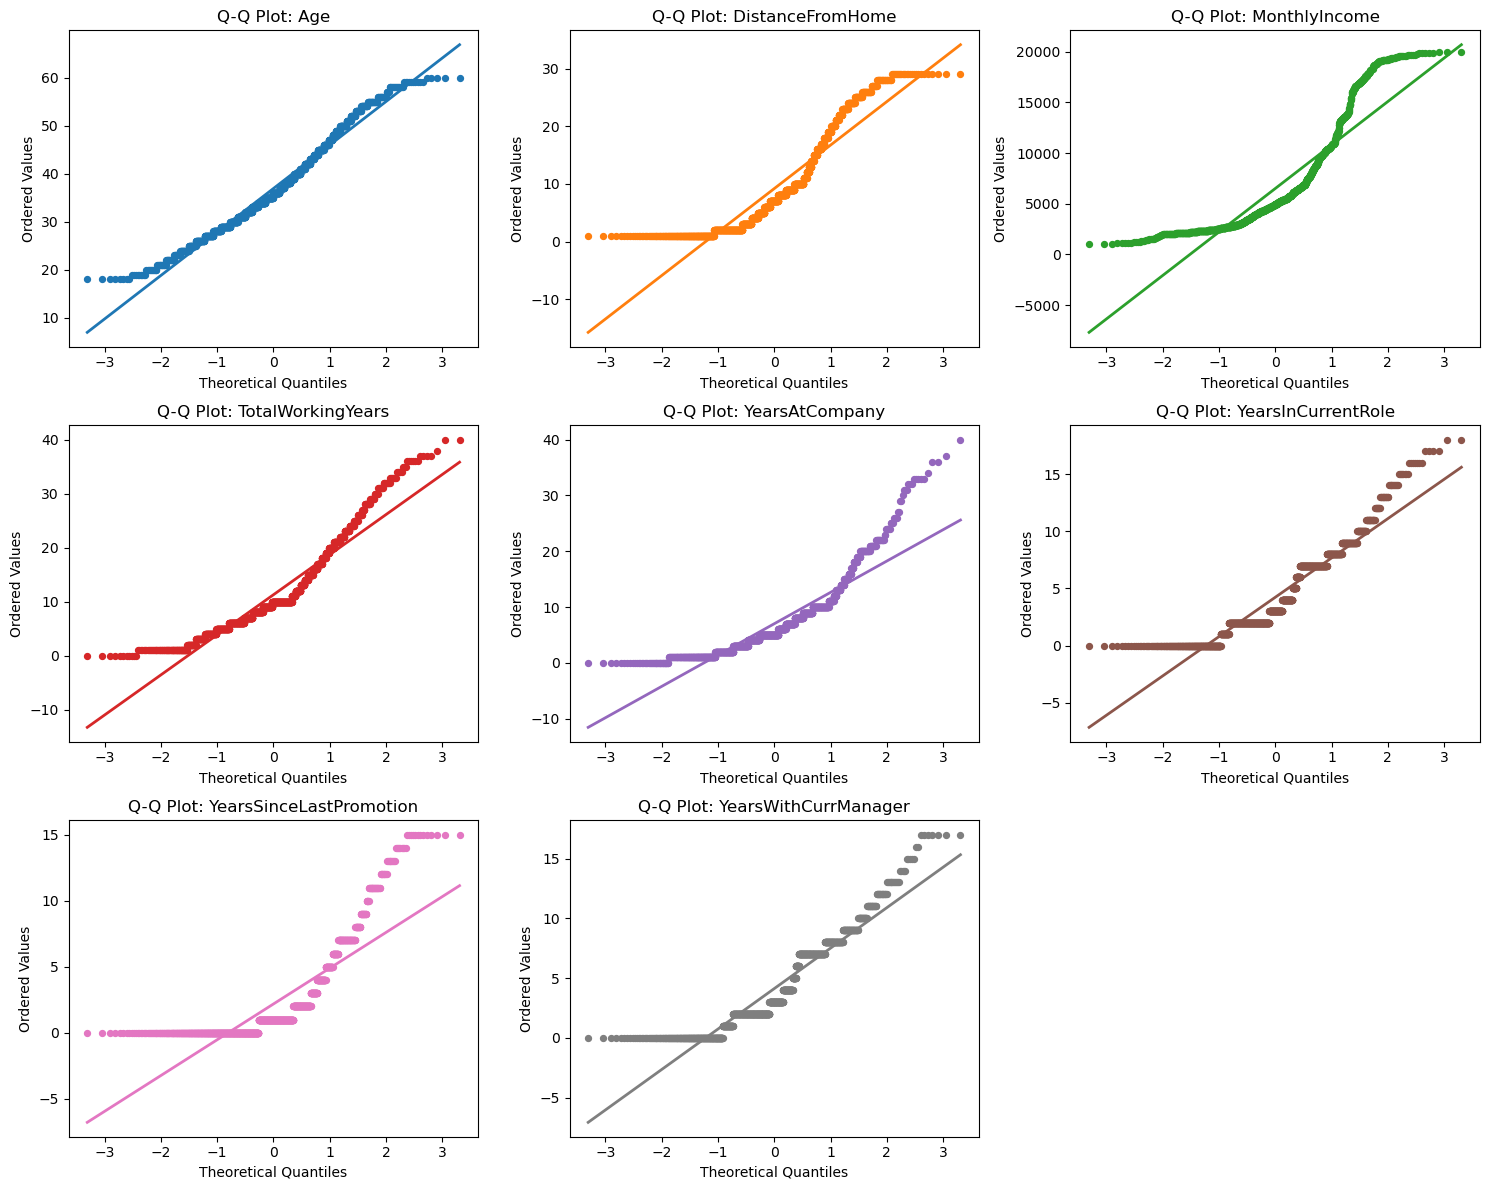

In [162]:
import scipy.stats as stats
n_plots = len(continuous_vars)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

colors = sns.color_palette("tab10", n_plots)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_vars):
    x = df[col].dropna().values
    color = colors[i]

    # theoretical quantiles (osm) and ordered responses (osr)
    (osm, osr), (slope, intercept, r) = stats.probplot(x, dist="norm")

    # scatter points
    axes[i].scatter(osm, osr, color=color, s=18)

    # fitted reference line
    line_x = np.array([osm.min(), osm.max()])
    line_y = slope * line_x + intercept
    axes[i].plot(line_x, line_y, color=color, linewidth=2)

    axes[i].set_title(f"Q-Q Plot: {col}")
    axes[i].set_xlabel("Theoretical Quantiles")
    axes[i].set_ylabel("Ordered Values")

# remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**3.2.3.4 Log Transformation**

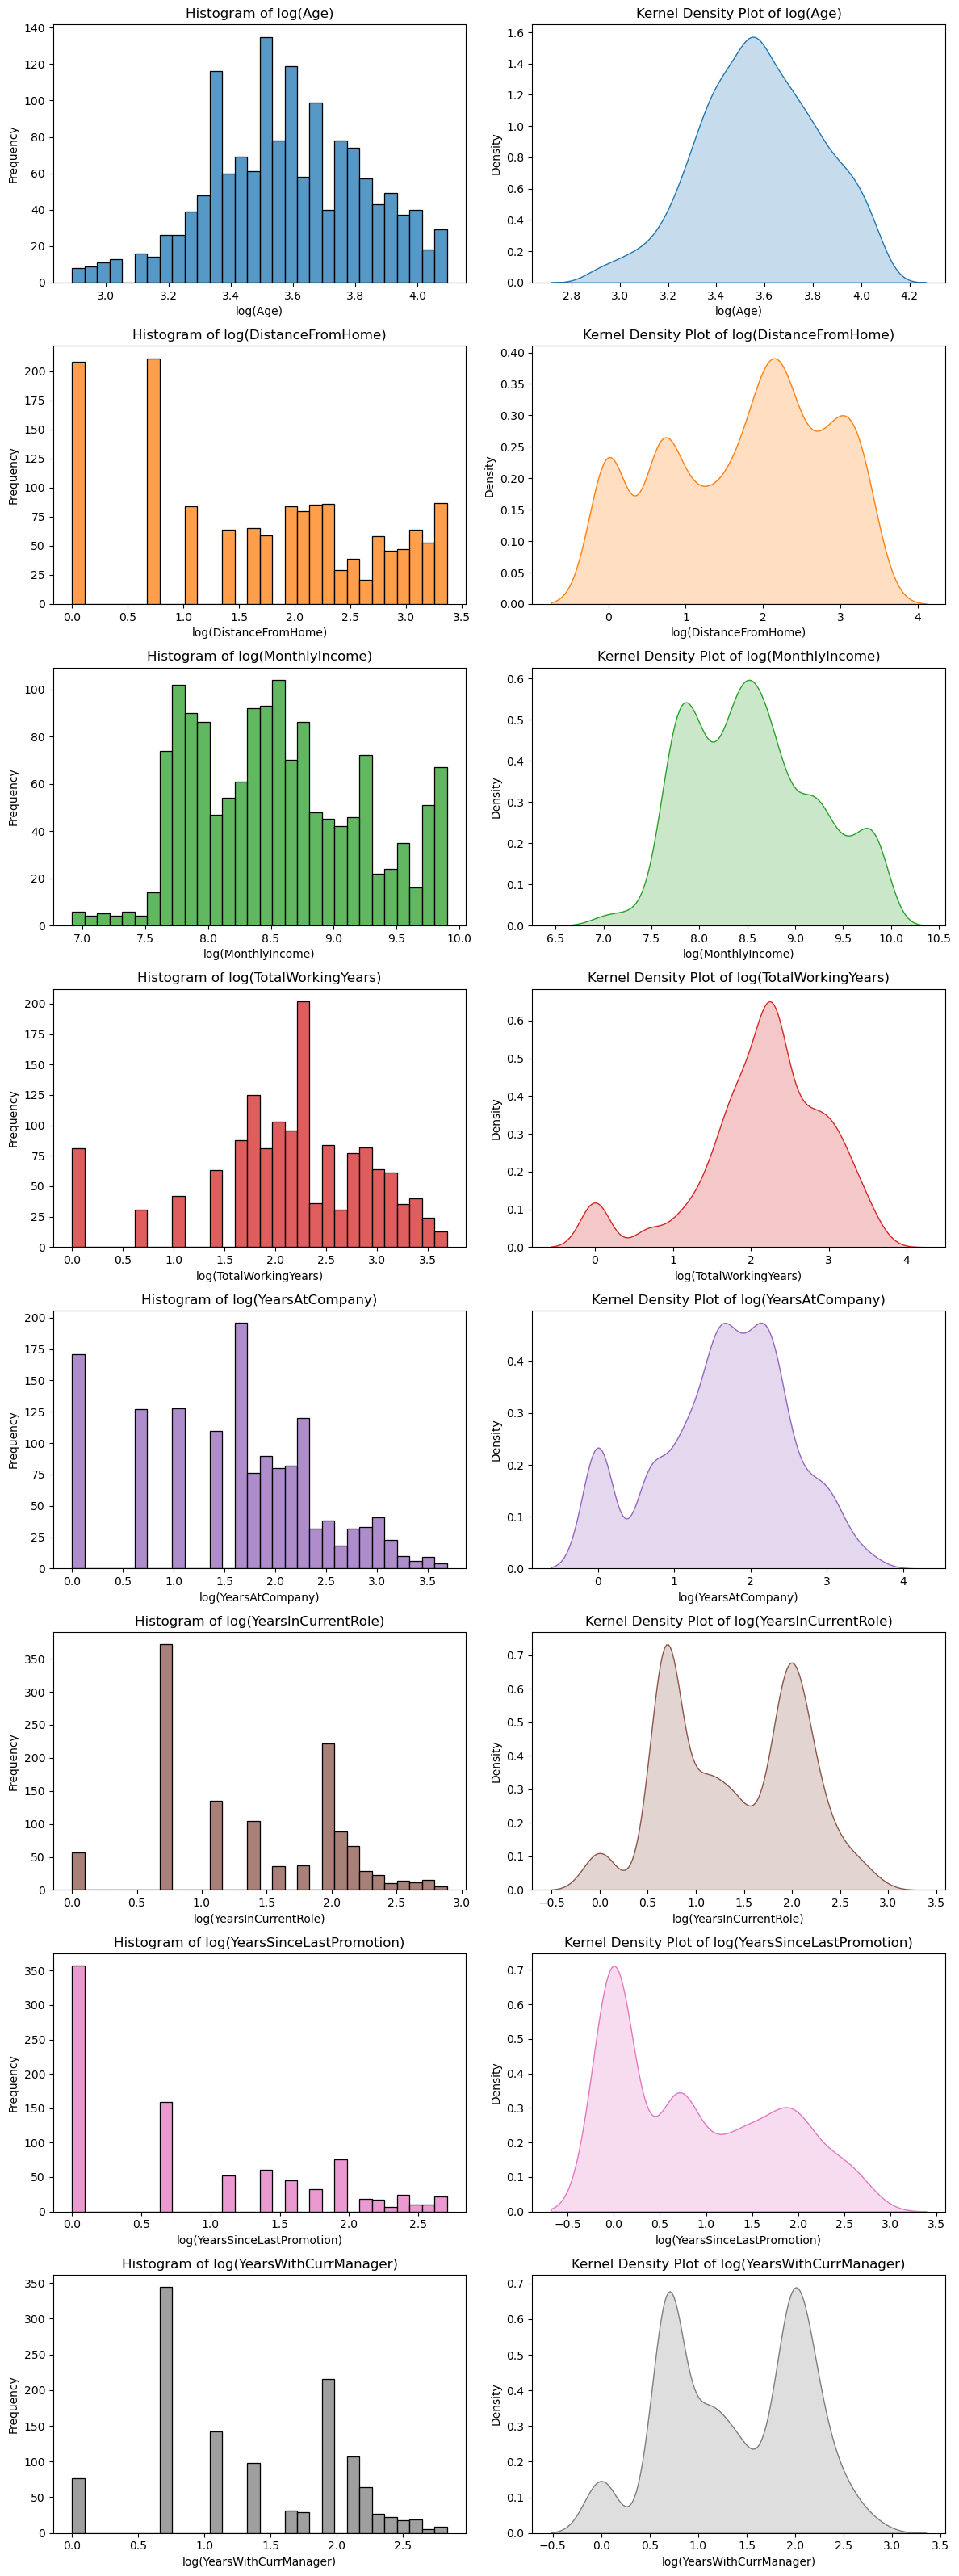

In [163]:
n_vars = len(continuous_vars)

fig, axes = plt.subplots(n_vars, 2, figsize=(12, 4 * n_vars))

# Fix for single variable case
if n_vars == 1:
    axes = [axes]

colors = sns.color_palette("tab10", n_vars)

for i, col in enumerate(continuous_vars):
    
    x = df[col].dropna()
    log_x = np.log(x)
    color = colors[i]
    
    # ---- Histogram (left) ----
    sns.histplot(
        log_x,
        bins=30,
        ax=axes[i][0],
        color=color
    )
    axes[i][0].set_title(f"Histogram of log({col})")
    axes[i][0].set_xlabel(f"log({col})")
    axes[i][0].set_ylabel("Frequency")
    
    # ---- KDE (right) ----
    sns.kdeplot(
        log_x,
        ax=axes[i][1],
        fill=True,
        color=color
    )
    axes[i][1].set_title(f"Kernel Density Plot of log({col})")
    axes[i][1].set_xlabel(f"log({col})")
    axes[i][1].set_ylabel("Density")

plt.tight_layout()
plt.show()

In [164]:
results_log = []

for col in continuous_vars:
    x = df[col].dropna()
    log_x = np.log(x)

    results_log.append({
        "Variable": col,
        "Log Skewness": log_x.skew(),
        "Log Kurtosis": log_x.kurt()
    })

log_stats_df = pd.DataFrame(results_log).round(2)
log_stats_df

Variable  Log Skewness  Log Kurtosis
0                      Age         -0.15         -0.33
1         DistanceFromHome         -0.25         -1.13
2            MonthlyIncome          0.29         -0.70
3        TotalWorkingYears           NaN           NaN
4           YearsAtCompany           NaN           NaN
5       YearsInCurrentRole           NaN           NaN
6  YearsSinceLastPromotion           NaN           NaN
7     YearsWithCurrManager           NaN           NaN

**3.2.3.5 Squared Transformation**

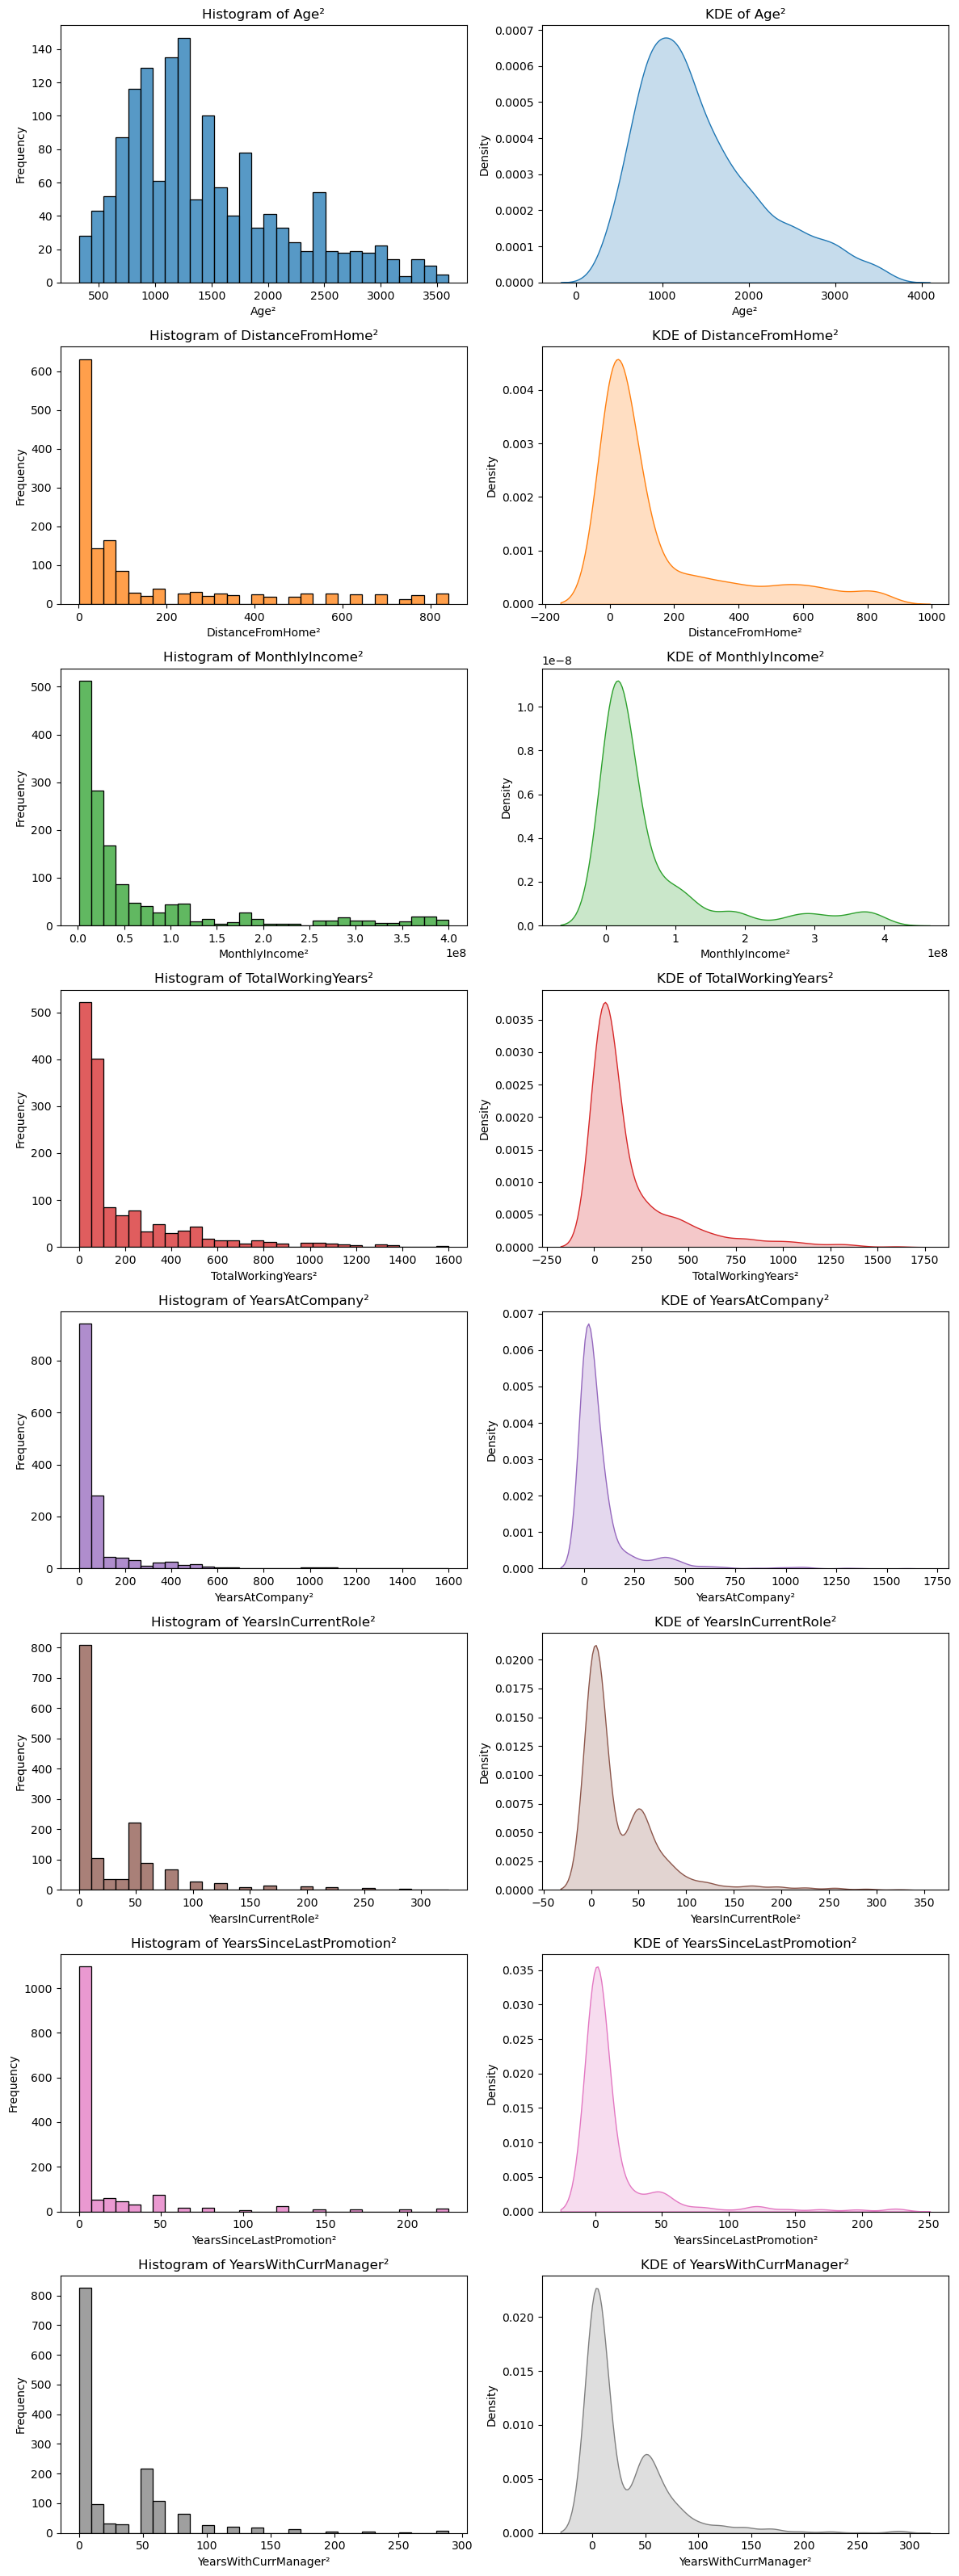

In [165]:
n_vars = len(continuous_vars)
colors = sns.color_palette("tab10", n_vars)

fig, axes = plt.subplots(n_vars, 2, figsize=(12, 4 * n_vars))

if n_vars == 1:
    axes = [axes]

for i, col in enumerate(continuous_vars):
    x = df[col].dropna()
    sq_x = x ** 2
    color = colors[i]

    # Histogram (left)
    sns.histplot(sq_x, bins=30, ax=axes[i][0], color=color)
    axes[i][0].set_title(f"Histogram of {col}²")
    axes[i][0].set_xlabel(f"{col}²")
    axes[i][0].set_ylabel("Frequency")

    # KDE (right)
    sns.kdeplot(sq_x, ax=axes[i][1], fill=True, color=color)
    axes[i][1].set_title(f"KDE of {col}²")
    axes[i][1].set_xlabel(f"{col}²")
    axes[i][1].set_ylabel("Density")

plt.tight_layout()
plt.show()

In [166]:
results_sq = []

for col in continuous_vars:
    x = df[col].dropna()
    sq_x = x ** 2

    results_sq.append({
        "Variable": col,
        "Squared Skewness": sq_x.skew(),
        "Squared Kurtosis": sq_x.kurt()
    })

sq_stats_df = pd.DataFrame(results_sq).round(2)
sq_stats_df

Variable  Squared Skewness  Squared Kurtosis
0                      Age              0.90              0.21
1         DistanceFromHome              1.71              1.83
2            MonthlyIncome              2.15              3.70
3        TotalWorkingYears              2.36              6.04
4           YearsAtCompany              4.10             21.57
5       YearsInCurrentRole              2.68              9.33
6  YearsSinceLastPromotion              3.58             13.84
7     YearsWithCurrManager              2.54              9.01

#### **3.3 Bivariate Analysis**


**3.3.1 Stratified Boxplots**

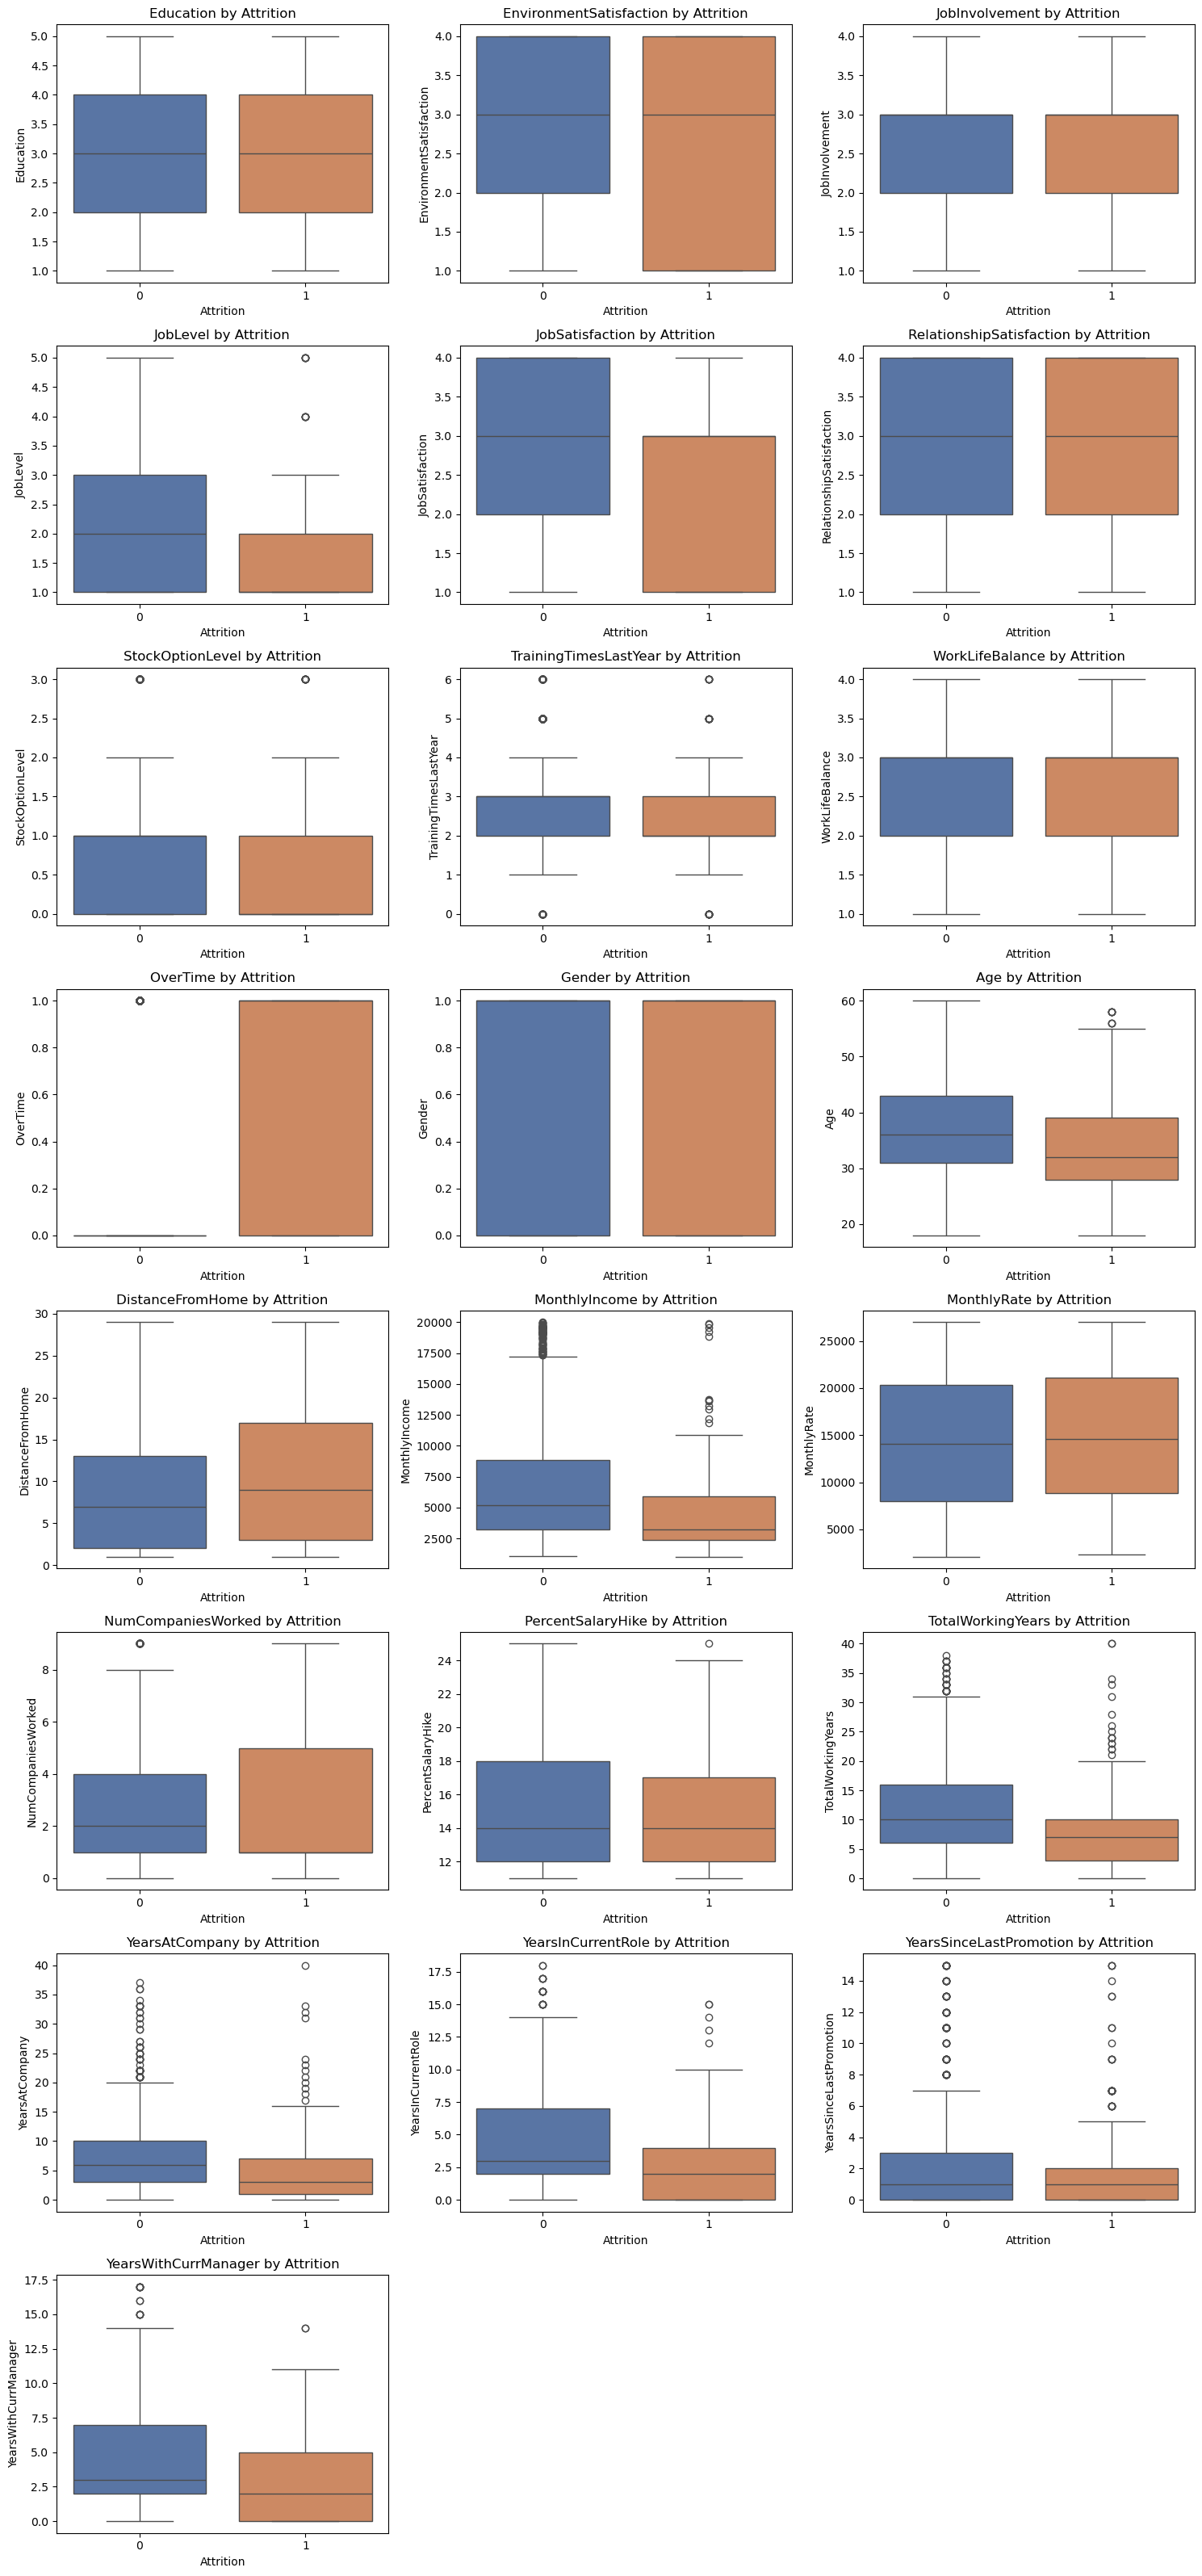

In [167]:
n_plots = len(numerical_vars)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

colors = sns.color_palette("tab10", n_plots)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_vars):
    
    sns.boxplot(
        x=df["Attrition"],
        y=df[col],
        ax=axes[i],
        palette=["#4C72B0", "#DD8452"]  # consistent class colors
    )
    
    axes[i].set_title(f"{col} by Attrition")
    axes[i].set_xlabel("Attrition")
    axes[i].set_ylabel(col)

# remove empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**3.3.2 Correlation with Attrition**

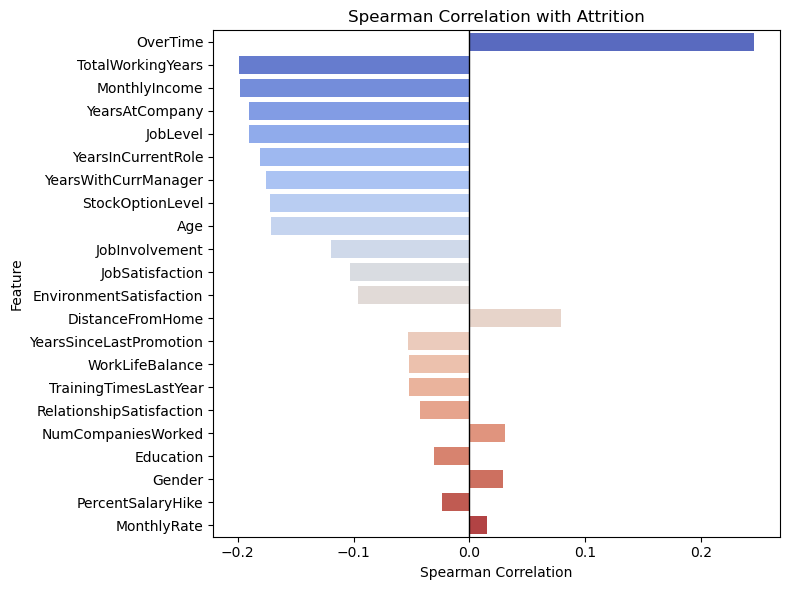

In [168]:
# Compute Spearman correlations
correlations = []

for col in numerical_vars:
    corr = df[[col, "Attrition"]].corr(method="spearman").iloc[0, 1]
    correlations.append({
        "Variable": col,
        "Spearman Correlation": corr
    })

# Create DataFrame
spearman_df = pd.DataFrame(correlations)

# Sort by absolute correlation (strongest at top)
spearman_df = spearman_df.reindex(
    spearman_df["Spearman Correlation"].abs().sort_values(ascending=False).index
)

# ---- Visualization ----
plt.figure(figsize=(8, 6))

sns.barplot(
    data=spearman_df,
    x="Spearman Correlation",
    y="Variable",
    palette="coolwarm"
)

plt.axvline(0, color="black", linewidth=1)
plt.title("Spearman Correlation with Attrition")
plt.xlabel("Spearman Correlation")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()

**3.3.3 Scatterplots**

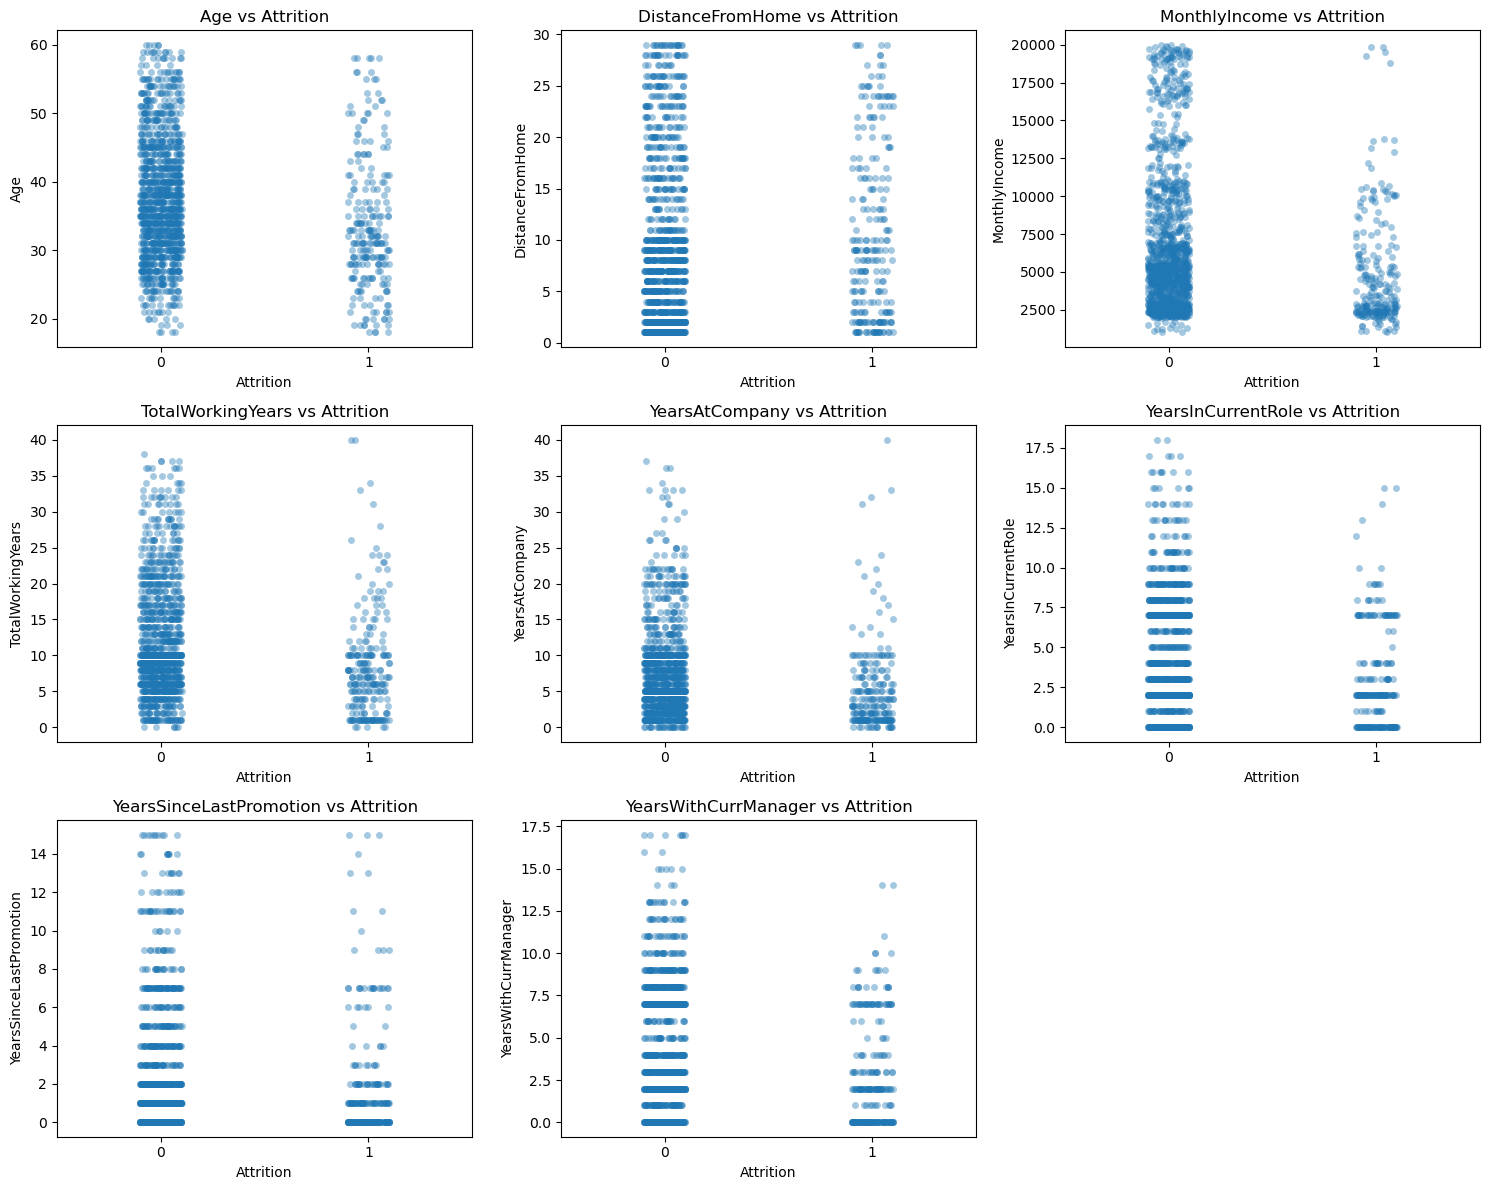

In [169]:
n_plots = len(continuous_vars)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_vars):
    
    sns.stripplot(
        x=df["Attrition"],
        y=df[col],
        ax=axes[i],
        jitter=True,
        alpha=0.4
    )
    
    axes[i].set_title(f"{col} vs Attrition")
    axes[i].set_xlabel("Attrition")
    axes[i].set_ylabel(col)

# remove empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **3.4 Multivariate Analysis**

**3.4.1 Correlation Matrix Heatmap**

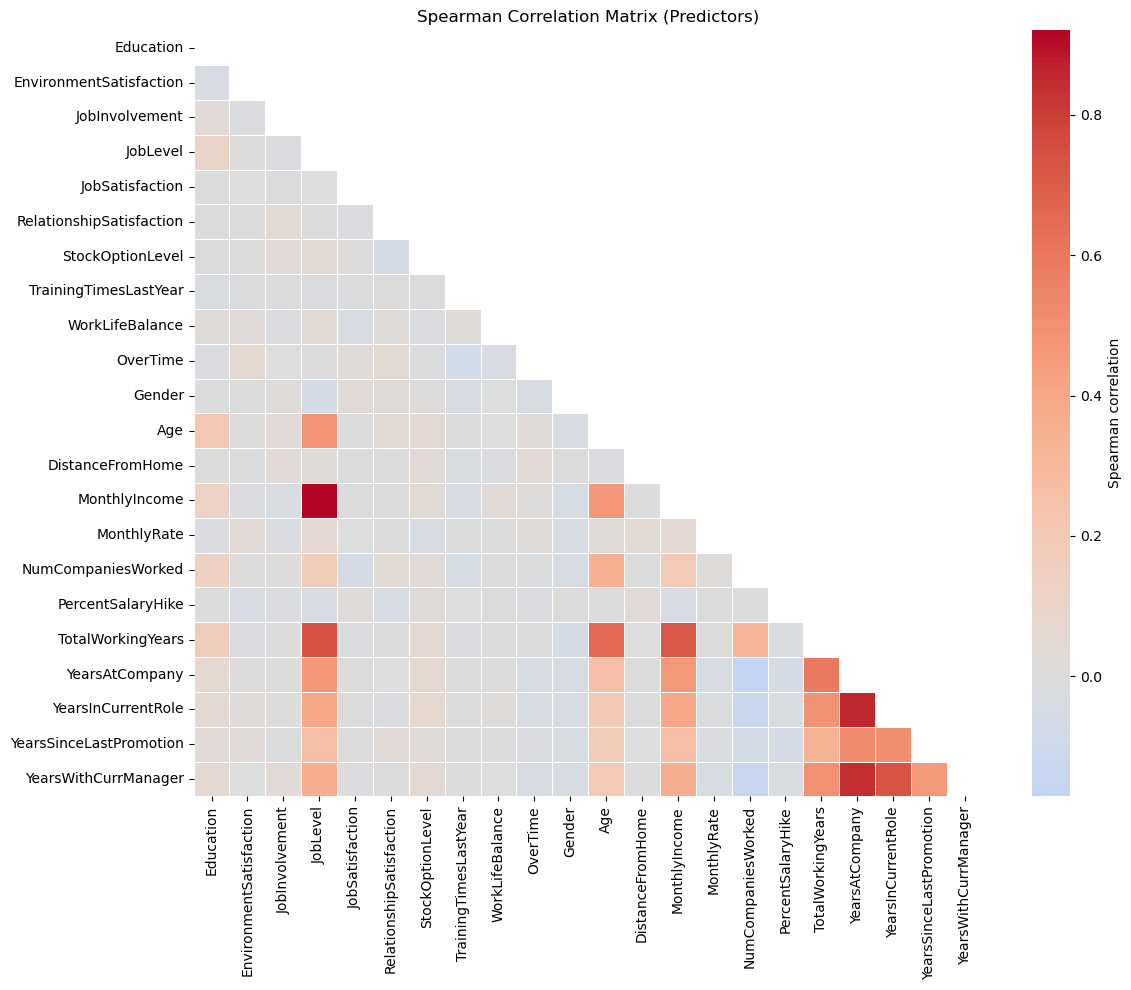

In [170]:
corr = df[numerical_vars].corr(method="spearman")

# mask upper triangle for readability
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"label": "Spearman correlation"}
)

plt.title("Spearman Correlation Matrix (Predictors)")
plt.tight_layout()
plt.show()

**3.4.2 PCA #Proposal from Chat. Delete?**

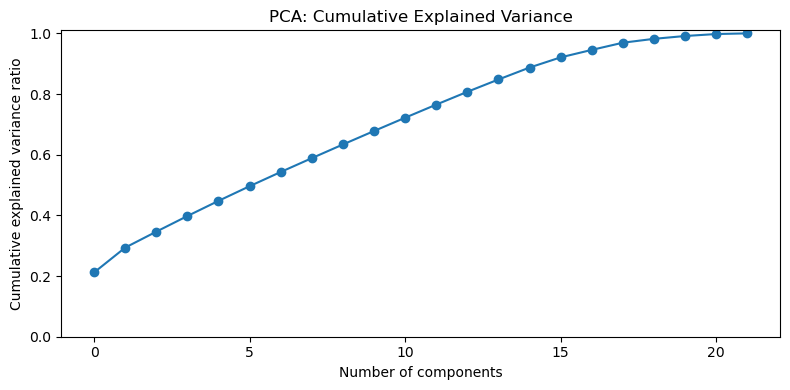

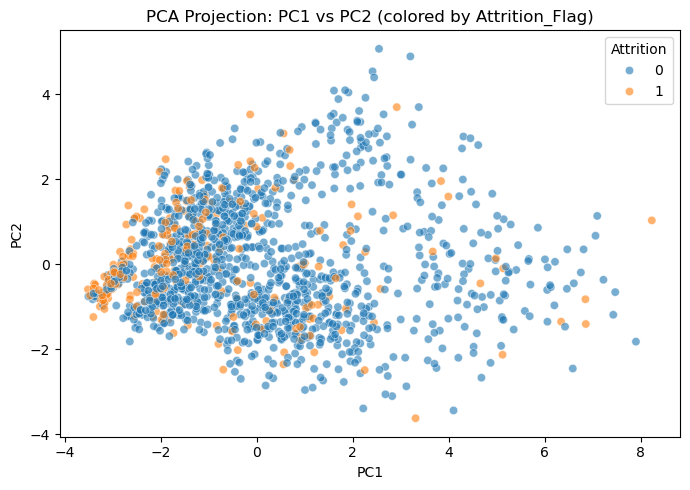

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Prepare X (drop missing rows for PCA)
X = df[numerical_vars].dropna()
y = df.loc[X.index, "Attrition"]

# If Attrition is not numeric 0/1, map it (adjust labels if needed)
if y.dtype == "object":
    y = y.map({"No Attrition": 0, "Attrition": 1})

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# --- 1) Explained variance ratio plot ---
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.title("PCA: Cumulative Explained Variance")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance ratio")
plt.ylim(0, 1.01)
plt.tight_layout()
plt.show()

# --- 2) 2D projection (PC1 vs PC2) ---
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca2[:, 0], y=X_pca2[:, 1], hue=y, alpha=0.6)
plt.title("PCA Projection: PC1 vs PC2 (colored by Attrition_Flag)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

**3.4.3 Interaction Efffects**

In [173]:
def interaction_heatmap(df, x_col, y_col, target="Attrition", q=5):
    tmp = df[[x_col, y_col, target]].dropna().copy()

    # map target if it's text (adjust if your labels differ)
    if tmp[target].dtype == "object":
        tmp[target] = tmp[target].map({"No Attrition": 0, "Attrition": 1})

    # quantile bins
    tmp["x_bin"] = pd.qcut(tmp[x_col], q=q, duplicates="drop")
    tmp["y_bin"] = pd.qcut(tmp[y_col], q=q, duplicates="drop")

    # target rate pivot
    pivot = tmp.pivot_table(index="y_bin", columns="x_bin", values=target, aggfunc="mean")

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, cmap="viridis", annot=True, fmt=".2f")
    plt.title(f"Interaction (Target Rate) Heatmap: {y_col} vs {x_col}\nCells = mean({target})")
    plt.xlabel(f"{x_col} (quantile bins)")
    plt.ylabel(f"{y_col} (quantile bins)")
    plt.tight_layout()
    plt.show()

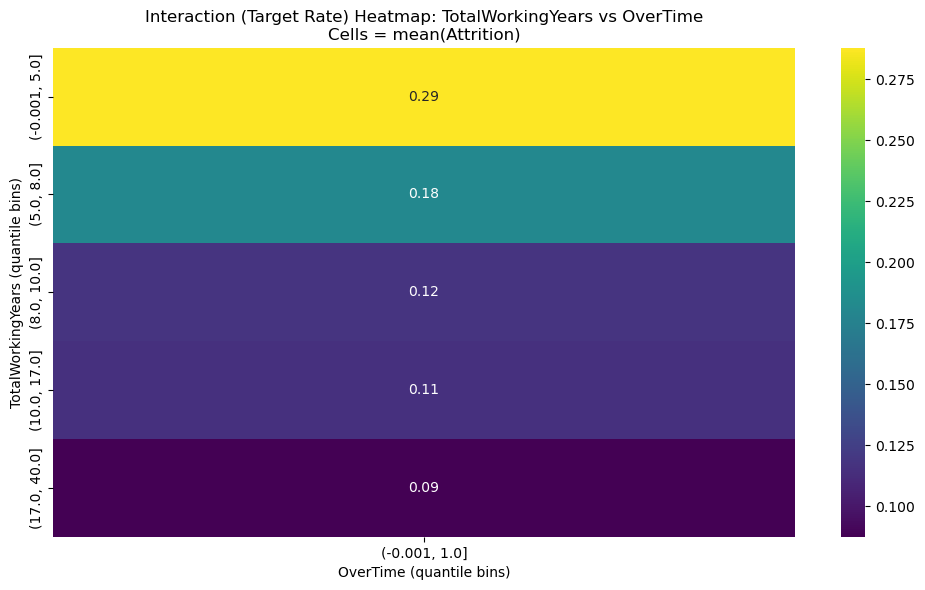

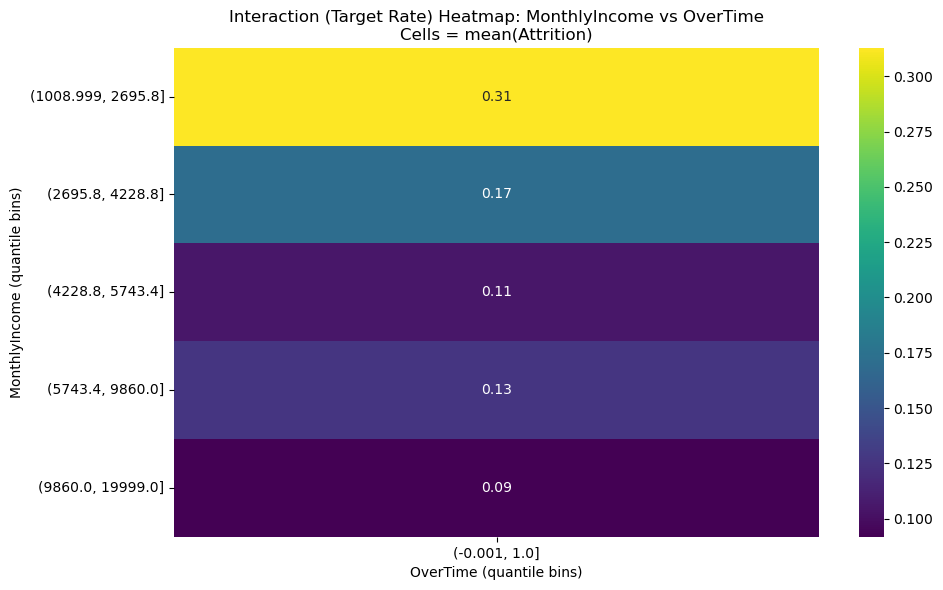

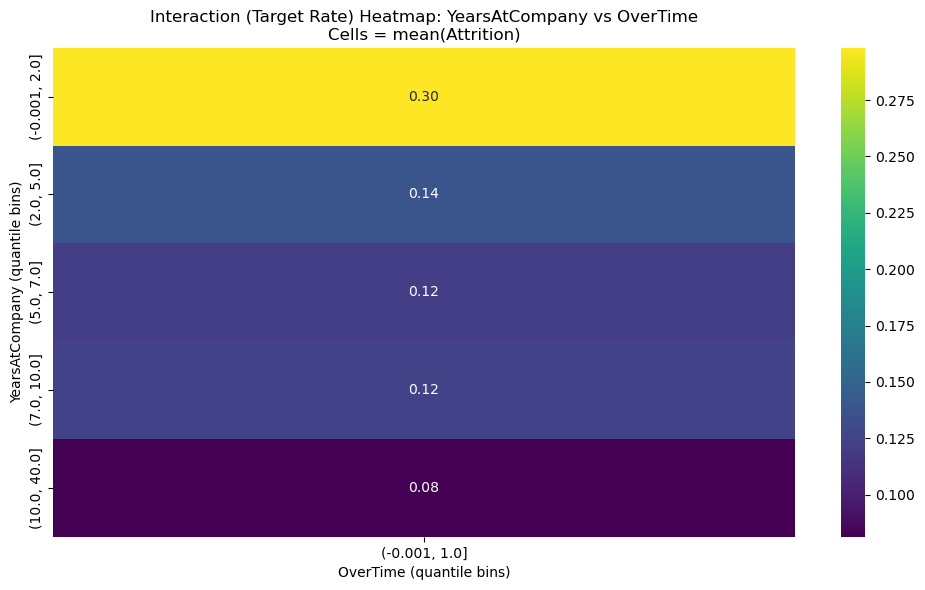

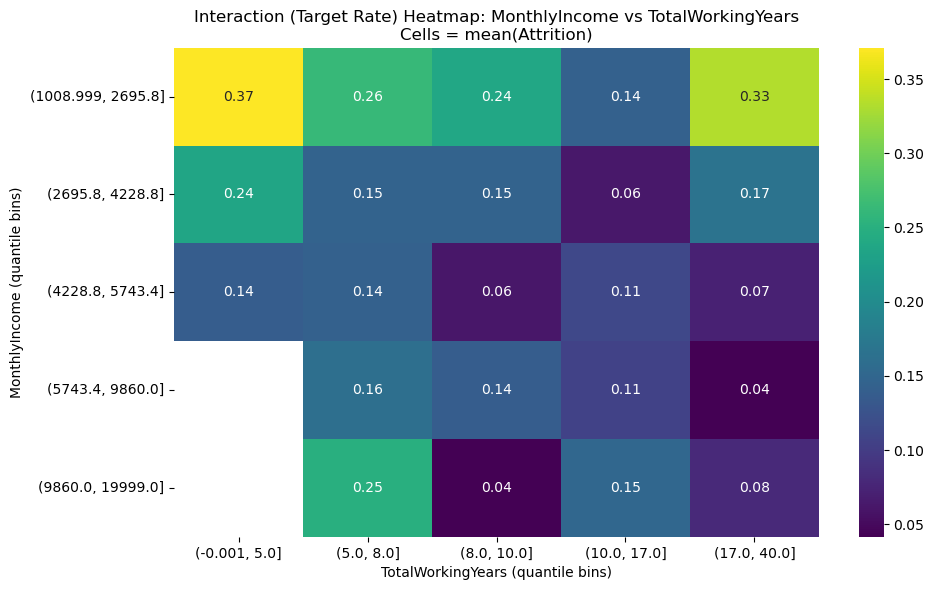

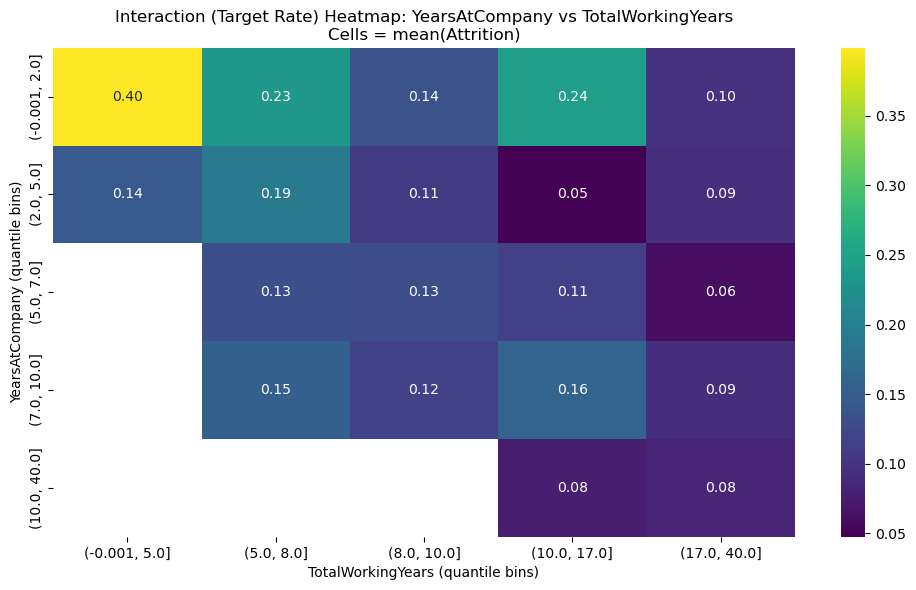

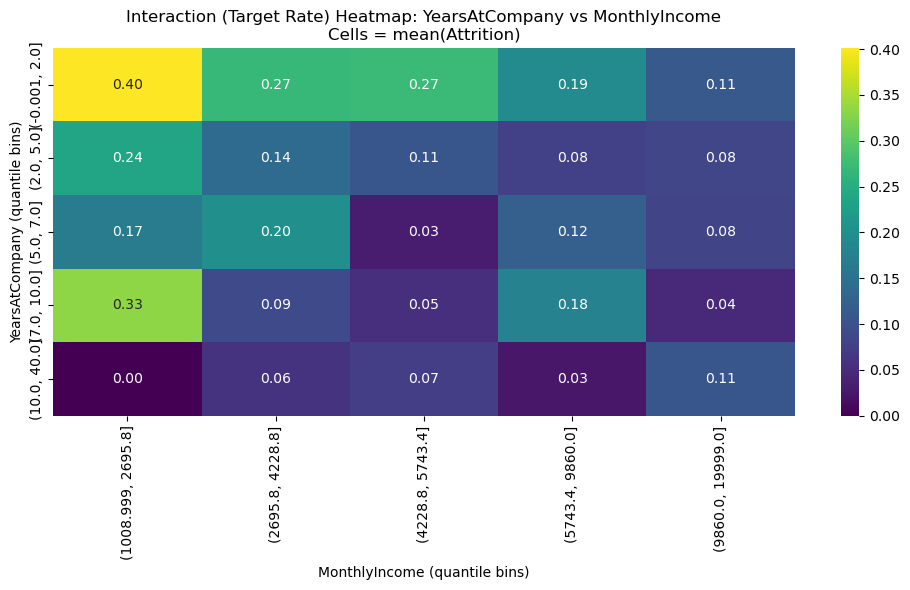

In [174]:
import itertools
# compute abs Spearman correlation with target to pick candidates
tmp = df[numerical_vars + ["Attrition"]].dropna().copy()
if tmp["Attrition"].dtype == "object":
    tmp["Attrition"] = tmp["Attrition"].map({"Existing Customer": 0, "Attrited Customer": 1})

scores = []
for col in numerical_vars:
    scores.append((col, tmp[[col, "Attrition"]].corr(method="spearman").iloc[0, 1]))

scores_df = pd.DataFrame(scores, columns=["Variable", "Spearman"]).assign(abs_spearman=lambda d: d["Spearman"].abs())
top_features = scores_df.sort_values("abs_spearman", ascending=False)["Variable"].head(4).tolist()

# plot pairwise interaction heatmaps
for a, b in itertools.combinations(top_features, 2):
    interaction_heatmap(df, a, b, target="Attrition", q=5)